# Importing Necessary Libraries

In [3]:
pip install --upgrade

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [3]:
#importing all the necessary liraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras. layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

# Loading Data

In [4]:
#Loading dataset
trainDataSet = pd.read_csv(r"C:\Users\bisha\OneDrive\Desktop\hrv dataset\data\final\train.csv")

In [5]:
#displaying data sample
trainDataSet.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


In [51]:
#loading test sample
testDataSet = pd.read_csv(r"C:\Users\bisha\OneDrive\Desktop\hrv dataset\data\final\test.csv")

In [52]:
#displaying test sample
testDataSet.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption


In [53]:
#Looking for the shape of test data set
testDataSet.shape

(41033, 36)

In [54]:
#checking if there are any null values
testDataSet.isnull().sum()

MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
SD1                  0
SD2                  0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64

# Preprocessing

In [55]:
#Droping unnecessary columns
trainSamples = trainDataSet.drop(['condition','datasetId'], axis = 1)

In [56]:
trainSamples

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,83.384647,0.933333,0.000000,6.797519,...,48.219676,89.119683,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087,2.096850,1.314910
369285,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,61.314243,6.333333,0.200000,9.734243,...,31.481178,99.642453,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588,2.131264,1.175975
369286,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,59.028594,30.400000,2.066667,16.304530,...,54.870376,99.819930,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804,2.215643,1.140232
369287,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,75.978628,10.000000,1.466667,11.838553,...,43.587168,96.477005,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516,2.091628,1.181937


In [57]:
trainSamples.shape


(369289, 34)

# Extracting labels from train and test dataset

In [58]:
trainLabels = trainDataSet['condition']

In [59]:
trainLabels = pd.get_dummies(trainDataSet['condition'])

In [60]:
trainLabels

,interruption,no stress,time pressure
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
369284,0,1,0
369285,0,1,0
369286,0,1,0
369287,0,1,0


In [61]:
testSamples = testDataSet.drop(['condition','datasetId'], axis = 1)


In [62]:
testLabels = testDataSet['condition']

In [63]:
testLabels= pd.get_dummies(testDataSet['condition'])

In [64]:
testlabels1 = testDataSet['condition']
labelencoder = LabelEncoder()
testLabels1 = labelencoder.fit_transform(testDataSet["condition"])

In [65]:
testLabels1

array([1, 2, 1, ..., 1, 1, 2])

In [66]:
testLabels

,interruption,no stress,time pressure
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
41028,0,0,1
41029,1,0,0
41030,0,1,0
41031,0,1,0


# Normalization

In [67]:
#Normalizing using Min Max Scaler
scaling = MinMaxScaler(feature_range=(0,1))
trainSamples = scaling.fit_transform(trainSamples)

In [68]:
trainSamples

array([[0.43596493, 0.29623337, 0.21209913, ..., 0.03539462, 0.94718154,
        0.39574294],
       [0.50603051, 0.37951539, 0.100855  , ..., 0.00679268, 0.96648135,
        0.15501473],
       [0.45278583, 0.34310938, 0.10678409, ..., 0.02431648, 0.94473507,
        0.43494913],
       ...,
       [0.61716237, 0.4469644 , 0.12694615, ..., 0.00388866, 0.98933569,
        0.32468371],
       [0.32359321, 0.25203294, 0.09550707, ..., 0.0844439 , 0.92044908,
        0.45213052],
       [0.34464579, 0.26226264, 0.07545588, ..., 0.08234303, 0.98519767,
        0.61149533]])

In [69]:
testSamples = scaling.fit_transform(testSamples)

In [70]:
testSamples

array([[0.22531332, 0.18486409, 0.08844309, ..., 0.26053516, 0.92367922,
        0.64162156],
       [0.38244367, 0.28799639, 0.0581626 , ..., 0.04047566, 0.99034621,
        0.66112158],
       [0.53098161, 0.39563865, 0.19693847, ..., 0.0183135 , 0.99026903,
        0.33885214],
       ...,
       [0.18331272, 0.12845198, 0.19874266, ..., 0.27243779, 0.91292724,
        0.55324208],
       [0.27636484, 0.21461972, 0.062443  , ..., 0.17858342, 0.97595153,
        0.61357042],
       [0.41409514, 0.31321216, 0.06339303, ..., 0.03413039, 0.9491316 ,
        0.33185303]])

# Normalization and Encoding


In [71]:
trainDataSet.condition.value_counts()

no stress        200082
interruption     105150
time pressure     64057
Name: condition, dtype: int64

In [72]:
pd.DataFrame(trainLabels) 

,interruption,no stress,time pressure
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
369284,0,1,0
369285,0,1,0
369286,0,1,0
369287,0,1,0


In [73]:
trainLabels.shape

(369289, 3)

In [74]:

model = Sequential()
model.add(Dense(34, input_shape= (34,), activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(36, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 34)                1190      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2240      
_________________________________________________________________
dense_8 (Dense)              (None, 36)                2340      
_________________________________________________________________
dense_9 (Dense)              (None, 12)                444       
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 117       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 30        
Total params: 6,361
Trainable params: 6,361
Non-trainable params: 0
____________________________________________________

In [76]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])
trained_model = model.fit(trainSamples,trainLabels, validation_split=0.1 ,batch_size=100,epochs=50,shuffle=True,verbose=2)

Epoch 1/50
3324/3324 - 7s - loss: 0.8549 - accuracy: 0.6214 - val_loss: 0.7380 - val_accuracy: 0.6801
Epoch 2/50
3324/3324 - 9s - loss: 0.6608 - accuracy: 0.7223 - val_loss: 0.6046 - val_accuracy: 0.7370
Epoch 3/50
3324/3324 - 8s - loss: 0.5448 - accuracy: 0.7771 - val_loss: 0.4969 - val_accuracy: 0.8082
Epoch 4/50
3324/3324 - 9s - loss: 0.4568 - accuracy: 0.8241 - val_loss: 0.4215 - val_accuracy: 0.8422
Epoch 5/50
3324/3324 - 10s - loss: 0.3935 - accuracy: 0.8490 - val_loss: 0.3798 - val_accuracy: 0.8500
Epoch 6/50
3324/3324 - 10s - loss: 0.3453 - accuracy: 0.8657 - val_loss: 0.3239 - val_accuracy: 0.8752
Epoch 7/50
3324/3324 - 9s - loss: 0.3027 - accuracy: 0.8835 - val_loss: 0.2813 - val_accuracy: 0.8943
Epoch 8/50
3324/3324 - 8s - loss: 0.2659 - accuracy: 0.9001 - val_loss: 0.2497 - val_accuracy: 0.9070
Epoch 9/50
3324/3324 - 9s - loss: 0.2367 - accuracy: 0.9120 - val_loss: 0.2250 - val_accuracy: 0.9184
Epoch 10/50
3324/3324 - 10s - loss: 0.2110 - accuracy: 0.9225 - val_loss: 0.1986

In [77]:
test_loss, test_acc = model.evaluate(testSamples,testLabels)

1283/1283 [==============================] - 1s 833us/step - loss: 0.0075 - accuracy: 0.9977


# Visualization


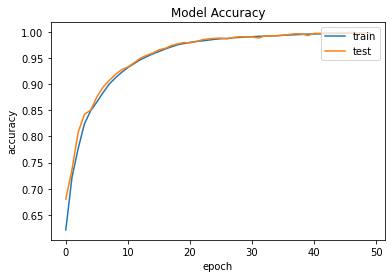

In [78]:
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper right')

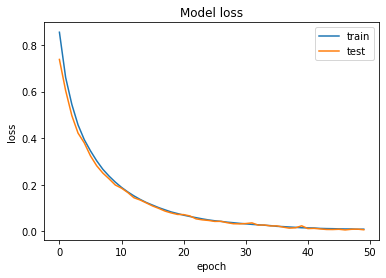

In [79]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper right')

# Prediction

In [80]:
predictions = model.predict(testSamples, batch_size = 10, verbose = 2)

4104/4104 - 3s


In [81]:
for i in predictions:
    print (i)

[8.49405e-23 1.00000e+00 0.00000e+00]
[4.61695e-10 3.88102e-08 1.00000e+00]
[4.4117782e-11 1.0000000e+00 6.4941502e-10]
[2.7403939e-09 1.0000000e+00 3.9259858e-17]
[1.0000000e+00 2.1898656e-15 0.0000000e+00]
[3.847614e-04 9.779933e-06 9.996055e-01]
[1.0000000e+00 3.2253059e-12 7.7326210e-12]
[6.2821265e-13 1.0000000e+00 5.7309050e-28]
[9.9999988e-01 3.3743876e-21 7.1482880e-08]
[6.273618e-15 1.000000e+00 7.884485e-20]
[3.3291112e-15 1.0000000e+00 3.5954273e-23]
[9.9999988e-01 1.2357347e-08 7.8524010e-08]
[1.0332614e-12 1.0000000e+00 5.2145493e-12]
[1.1248702e-05 9.9998868e-01 1.1511010e-07]
[1.1379509e-10 1.0000000e+00 4.8433393e-11]
[0.00142403 0.9965443  0.00203164]
[1.0000000e+00 2.2686617e-13 4.2252921e-10]
[9.9962234e-01 1.8202380e-06 3.7586121e-04]
[1.0000000e+00 5.5911641e-15 1.7287803e-16]
[9.9999964e-01 2.5928844e-13 3.7410572e-07]
[1.5596382e-12 1.0000000e+00 5.1843417e-12]
[3.7524800e-10 1.0000000e+00 2.5720687e-10]
[1.3230178e-05 9.9948335e-01 5.0340471e-04]
[9.9997079e-01 

[1.0000000e+00 5.8345656e-26 2.7763888e-14]
[7.1136029e-16 1.0000000e+00 8.2179367e-38]
[1.0915648e-03 6.6904804e-10 9.9890840e-01]
[1.0000000e+00 5.8925586e-13 7.8248900e-12]
[2.3666573e-08 1.0015204e-13 1.0000000e+00]
[1.7053734e-09 2.8379297e-09 1.0000000e+00]
[4.3417490e-03 6.1265207e-05 9.9559695e-01]
[6.104625e-02 9.384151e-01 5.386732e-04]
[3.0469034e-12 1.0000000e+00 2.8942146e-11]
[9.999938e-01 1.798600e-12 6.258305e-06]
[2.4854341e-09 1.0000000e+00 7.0123844e-11]
[2.9579712e-14 1.0000000e+00 1.4414062e-31]
[2.8818112e-10 1.0000000e+00 1.0580960e-11]
[1.0000000e+00 1.1589778e-09 1.3034646e-08]
[0.00405053 0.00138873 0.9945608 ]
[5.3179315e-07 9.9970895e-01 2.9050588e-04]
[8.6861346e-03 9.9131387e-01 1.2625051e-10]
[8.0078689e-07 9.9999917e-01 6.4023261e-16]
[6.8432288e-05 9.9993086e-01 7.0654801e-07]
[1.3959287e-17 1.0000000e+00 5.2114483e-19]
[7.667569e-06 9.999924e-01 8.829143e-09]
[1.0000000e+00 1.2002296e-10 1.2800973e-24]
[1.2976730e-26 1.0000000e+00 1.4472354e-31]
[3.361

[9.901081e-16 1.445275e-26 1.000000e+00]
[0. 1. 0.]
[9.999356e-01 6.436017e-05 5.850247e-11]
[1.000000e+00 5.127776e-34 5.641809e-24]
[5.4225526e-12 1.0000000e+00 4.5461009e-13]
[1.0000000e+00 1.7720566e-13 4.3402001e-11]
[6.158898e-11 1.000000e+00 0.000000e+00]
[4.8022196e-04 2.4763594e-05 9.9949503e-01]
[2.32009926e-15 1.00000000e+00 1.06550104e-13]
[8.1655063e-04 9.9915588e-01 2.7494005e-05]
[1.0603291e-02 3.1870982e-06 9.8939359e-01]
[6.341021e-12 1.000000e+00 4.528744e-30]
[0. 1. 0.]
[2.3105752e-06 9.9895430e-01 1.0434105e-03]
[2.4101491e-06 9.9999762e-01 1.0554779e-17]
[8.551904e-27 1.000000e+00 5.749975e-29]
[1.5130773e-08 9.9907660e-01 9.2335127e-04]
[0.08561266 0.91235906 0.00202834]
[8.9264205e-03 9.9107331e-01 1.9168556e-07]
[2.1736053e-13 9.9999988e-01 7.7124568e-08]
[3.1664394e-04 9.9968338e-01 2.6090784e-20]
[1.5015489e-09 1.0000000e+00 6.7664363e-10]
[9.9999833e-01 1.1382922e-06 5.1085919e-07]
[4.4164105e-14 1.0000000e+00 1.7529332e-38]
[1.2391863e-22 1.0000000e+00 0.000

[9.9999917e-01 8.3620881e-07 2.8545610e-09]
[1.0000000e+00 3.2829095e-19 0.0000000e+00]
[5.0035707e-14 1.0000000e+00 1.9018482e-15]
[9.9999952e-01 5.1920216e-07 1.0010621e-12]
[8.1666070e-04 2.5477966e-09 9.9918336e-01]
[5.182810e-07 5.351334e-09 9.999995e-01]
[6.0007710e-10 2.0546526e-10 1.0000000e+00]
[2.9220806e-05 8.1969626e-10 9.9997079e-01]
[2.785288e-11 1.000000e+00 4.150394e-21]
[1.0000000e+00 4.0522813e-16 1.0093290e-21]
[0.0214219  0.16058968 0.81798846]
[1.0000000e+00 5.3016123e-22 2.2378231e-08]
[1.0000000e+00 2.8555262e-21 0.0000000e+00]
[1.0000000e+00 1.0171142e-08 4.5404408e-21]
[9.9999940e-01 5.6150856e-07 2.1330964e-09]
[9.59826230e-06 1.15124826e-10 9.99990344e-01]
[1.0000000e+00 6.6955472e-09 3.3517533e-16]
[9.9999988e-01 1.1531663e-07 7.0322015e-16]
[1.3772518e-10 1.0000000e+00 1.6468900e-10]
[4.4671140e-04 1.6678879e-11 9.9955326e-01]
[4.0683677e-04 9.9959320e-01 4.6147837e-09]
[9.9999857e-01 1.4207802e-06 4.7863438e-13]
[9.9606293e-01 2.2341873e-09 3.9370973e-03]


[9.9999285e-01 7.0960464e-06 2.9790974e-18]
[2.3540844e-22 1.0000000e+00 5.1661870e-24]
[1.3629872e-08 1.0000000e+00 1.5911477e-13]
[5.0613715e-11 1.0000000e+00 5.2888043e-15]
[1.9000981e-06 9.9999809e-01 2.9505086e-08]
[1.3476793e-03 9.9812108e-01 5.3130038e-04]
[1.9139796e-16 1.0000000e+00 5.4943429e-32]
[2.7318127e-05 7.3223092e-08 9.9997258e-01]
[4.3356649e-19 1.0000000e+00 2.8692763e-19]
[1.0000000e+00 5.3185505e-13 1.8188819e-09]
[1.00000000e+00 1.11711055e-13 1.92773922e-10]
[7.401465e-16 1.000000e+00 5.912753e-29]
[3.5132602e-18 1.0000000e+00 3.1795389e-34]
[1.0163777e-07 3.8079633e-09 9.9999988e-01]
[9.8966670e-01 1.9398804e-08 1.0333340e-02]
[5.4154111e-08 1.0000000e+00 3.2981348e-12]
[2.6445223e-11 1.0000000e+00 5.4995690e-23]
[1.0000000e+00 5.3509687e-13 5.1561602e-11]
[3.7215023e-14 1.0000000e+00 0.0000000e+00]
[6.338285e-13 1.000000e+00 7.025458e-20]
[9.9999976e-01 2.1165154e-07 1.1518634e-13]
[1.0000000e+00 2.3460462e-08 1.1608123e-08]
[9.4131830e-15 1.0000000e+00 8.2638

[4.732480e-03 9.952675e-01 4.084438e-08]
[1.0000000e+00 9.2905245e-10 3.3663685e-08]
[2.7659534e-19 1.0000000e+00 7.3476773e-16]
[1.2843613e-07 3.9180086e-11 9.9999988e-01]
[1.3654823e-04 2.0165012e-06 9.9986136e-01]
[1.8640415e-12 1.0000000e+00 4.4967122e-13]
[1.000000e+00 8.712406e-25 0.000000e+00]
[6.0086313e-07 3.6530139e-07 9.9999905e-01]
[1.0000000e+00 8.6149652e-20 2.6712675e-12]
[9.3438759e-02 9.0656114e-01 9.7670302e-08]
[1.0000000e+00 3.9408413e-13 2.5819136e-25]
[1.0000000e+00 2.7225987e-15 2.6970384e-09]
[1.0000000e+00 4.9331394e-08 8.5766400e-26]
[0. 1. 0.]
[9.9930632e-01 6.5201697e-09 6.9373142e-04]
[9.9999738e-01 1.4700427e-11 2.5736151e-06]
[9.1252974e-14 3.5703325e-16 1.0000000e+00]
[1.0000000e+00 1.0587758e-08 1.3046187e-08]
[1.1070477e-03 6.8668560e-06 9.9888605e-01]
[5.379699e-15 1.000000e+00 6.072182e-16]
[3.1285079e-03 9.9687153e-01 1.4233298e-15]
[9.932749e-01 1.943389e-14 6.725120e-03]
[1.0000000e+00 1.9843780e-17 1.4757664e-11]
[1.0000000e+00 1.2608778e-14 3.15

[1.0000000e+00 7.9807927e-15 5.1236515e-11]
[9.9999392e-01 6.0320972e-06 1.2627315e-09]
[9.9995446e-01 2.5517689e-15 4.5543740e-05]
[1.6297909e-10 1.9747997e-20 1.0000000e+00]
[1.0000000e+00 4.2703694e-26 4.6308727e-15]
[1.3479124e-08 1.0000000e+00 4.2605761e-25]
[1.0000000e+00 4.9700271e-09 4.0324785e-25]
[1.0000000e+00 1.1976060e-15 2.8695317e-09]
[5.7232241e-10 1.0000000e+00 4.7827124e-12]
[4.1247666e-05 1.9701338e-11 9.9995875e-01]
[9.9999821e-01 1.7931447e-06 1.1634624e-10]
[1.8278022e-09 2.8382942e-19 1.0000000e+00]
[4.9484365e-11 1.0000000e+00 5.2508210e-11]
[9.9936551e-01 1.5573161e-06 6.3294434e-04]
[2.4549285e-04 8.0683702e-07 9.9975365e-01]
[2.9189871e-07 7.0345271e-11 9.9999976e-01]
[1.0450062e-05 8.9462734e-12 9.9998951e-01]
[1.0000000e+00 0.0000000e+00 2.4416237e-35]
[1.7724789e-08 9.9999535e-01 4.6107516e-06]
[9.8076999e-17 1.0000000e+00 4.7024817e-18]
[9.9999774e-01 2.3569295e-09 2.2787519e-06]
[5.5698376e-07 9.9999940e-01 7.8758806e-28]
[5.1793247e-04 9.9641150e-01 3.0

[3.9650535e-05 9.9996030e-01 2.1462201e-08]
[1.7298622e-16 1.0000000e+00 2.4337591e-33]
[1.2278662e-05 9.9733716e-01 2.6506123e-03]
[1.03817075e-30 1.00000000e+00 1.72091762e-31]
[0. 1. 0.]
[4.9032019e-07 9.9999952e-01 4.5913477e-22]
[4.985347e-29 1.000000e+00 9.709789e-33]
[9.3748292e-04 9.9906248e-01 1.6229666e-18]
[1.0000000e+00 5.8054791e-08 3.7396378e-15]
[9.9999869e-01 1.2659394e-06 1.9826110e-11]
[4.4613904e-03 9.9553818e-01 3.3961459e-07]
[0.91374964 0.0059748  0.08027561]
[4.1706699e-06 4.7077268e-07 9.9999535e-01]
[1.0000000e+00 1.4314612e-08 1.0270099e-11]
[1.0000000e+00 1.2384398e-14 8.1351463e-14]
[3.0910282e-03 2.5833303e-06 9.9690634e-01]
[8.5492081e-17 1.0000000e+00 1.9690291e-21]
[6.9917412e-03 9.9298698e-01 2.1308948e-05]
[1.8673236e-02 9.8132598e-01 8.5198752e-07]
[0.00280397 0.00956261 0.98763347]
[3.6385288e-09 1.0000000e+00 3.1323750e-09]
[2.4283264e-13 1.0000000e+00 4.4332173e-20]
[6.8913806e-08 9.9998903e-01 1.0851367e-05]
[2.441683e-10 1.000000e+00 6.969394e-15

[1.5312890e-03 6.1704745e-11 9.9846870e-01]
[2.333181e-38 1.000000e+00 0.000000e+00]
[1.0000000e+00 1.0104483e-17 5.1529183e-25]
[4.795493e-15 1.000000e+00 1.180551e-15]
[5.517514e-38 1.000000e+00 0.000000e+00]
[4.917771e-05 9.679258e-01 3.202503e-02]
[1.0000000e+00 1.9397266e-17 2.1971616e-08]
[1.0000000e+00 1.6730555e-24 1.2586138e-15]
[9.9999881e-01 1.1620140e-06 1.2269848e-08]
[1.0000000e+00 6.2210079e-27 3.1215925e-16]
[6.8786222e-04 5.4104680e-07 9.9931157e-01]
[9.9999964e-01 1.1743384e-08 3.3309720e-07]
[1.9320088e-14 1.0000000e+00 3.6380496e-13]
[4.8108430e-13 1.0000000e+00 1.6809798e-11]
[7.7372140e-05 1.0173945e-08 9.9992263e-01]
[1.0000000e+00 1.6723823e-20 6.2310309e-27]
[9.9749076e-01 2.5092140e-03 3.7455962e-08]
[9.9995673e-01 1.9121016e-16 4.3311360e-05]
[1.0000000e+00 2.5853510e-08 3.1733399e-16]
[2.1583165e-31 1.0000000e+00 0.0000000e+00]
[9.9999928e-01 7.0230016e-07 1.7185903e-09]
[5.8522612e-02 9.4147468e-01 2.7008332e-06]
[1.6985331e-03 5.5106968e-04 9.9775034e-01]


[0.06476431 0.75034165 0.18489406]
[3.8135826e-05 9.9996185e-01 9.0242949e-23]
[5.6253686e-09 1.8118090e-23 1.0000000e+00]
[1.0055312e-03 9.9899393e-01 4.3662035e-07]
[1.3233796e-09 1.0000000e+00 4.9116285e-16]
[0. 1. 0.]
[1.9613806e-05 3.8122516e-02 9.6185791e-01]
[1.2230119e-08 1.0000000e+00 5.7646858e-08]
[2.7378313e-03 9.9722844e-01 3.3777793e-05]
[2.9951766e-09 2.8942760e-18 1.0000000e+00]
[1.0000000e+00 2.8254984e-15 1.3021529e-15]
[2.2862372e-24 1.0000000e+00 9.5953830e-26]
[9.9999952e-01 4.5052397e-07 1.8711206e-10]
[1.0000000e+00 1.6181356e-13 9.5764474e-10]
[9.9999952e-01 2.5451929e-17 4.8551766e-07]
[1.0000000e+00 5.2750888e-09 5.3677876e-38]
[9.9887222e-01 1.1278142e-03 2.0534330e-09]
[9.999994e-01 9.184229e-13 6.161698e-07]
[1.0388519e-08 1.0000000e+00 7.3708359e-09]
[9.9369746e-01 5.2114362e-13 6.3025099e-03]
[1.000000e+00 9.702803e-12 2.301741e-19]
[4.1664462e-06 9.9999583e-01 3.8986223e-09]
[3.7900874e-09 7.8646005e-12 1.0000000e+00]
[2.1177602e-14 1.0000000e+00 0.00000

[5.7754994e-21 1.0000000e+00 2.8692297e-36]
[1.0135884e-04 9.9941432e-01 4.8431358e-04]
[4.7954873e-10 1.0000000e+00 9.6011317e-11]
[9.9999964e-01 3.7860329e-07 8.8225170e-14]
[8.2859425e-03 9.9171352e-01 5.7080894e-07]
[2.6001531e-05 9.9997401e-01 5.2869981e-13]
[1.5724892e-07 9.9999988e-01 6.4366429e-11]
[1.1008860e-03 1.4558453e-05 9.9888462e-01]
[1.3644086e-03 1.3619925e-04 9.9849939e-01]
[9.9757749e-01 1.7499999e-04 2.2474602e-03]
[8.956115e-16 1.000000e+00 1.870654e-25]
[1.0000000e+00 2.6522928e-10 1.7962457e-12]
[2.2592357e-09 9.9927551e-01 7.2450435e-04]
[1.545423e-10 9.999999e-01 7.758061e-08]
[1.2580561e-09 1.0000000e+00 9.5376562e-10]
[1.0376809e-09 9.9999988e-01 1.6994427e-07]
[1.1028747e-10 1.0000000e+00 5.1308424e-10]
[1.000000e+00 6.403761e-12 4.662564e-16]
[4.3329759e-08 9.9999964e-01 3.1673548e-07]
[9.9985111e-01 1.4887752e-04 5.1843516e-23]
[8.705869e-38 1.000000e+00 0.000000e+00]
[1.8953525e-02 3.5346960e-12 9.8104650e-01]
[9.9948883e-01 7.4744085e-13 5.1116315e-04]


[9.9993181e-01 1.9644829e-14 6.8141700e-05]
[7.4966294e-05 1.6300130e-05 9.9990869e-01]
[8.3154759e-05 2.5811093e-09 9.9991679e-01]
[1.3736801e-15 1.0000000e+00 8.5605762e-22]
[1.4414933e-03 9.9855846e-01 2.2210997e-17]
[9.9999988e-01 4.3664711e-11 8.2368615e-08]
[3.8578961e-02 9.6142101e-01 1.0627278e-22]
[5.5469116e-08 2.2428916e-15 1.0000000e+00]
[9.9999917e-01 8.0252846e-07 5.0245173e-15]
[1.0000000e+00 1.6472791e-18 0.0000000e+00]
[2.0351692e-07 9.9999976e-01 3.0940701e-12]
[9.9985731e-01 1.4255792e-04 8.9997698e-08]
[2.8500944e-22 1.0000000e+00 0.0000000e+00]
[3.3279804e-08 1.0000000e+00 4.2930212e-12]
[1.0000000e+00 2.2400260e-16 1.9733273e-09]
[9.9991500e-01 8.1570215e-05 3.4902284e-06]
[1.0000000e+00 4.8517279e-10 4.0037206e-19]
[6.0850642e-05 2.1684692e-11 9.9993920e-01]
[5.6592553e-10 1.0000000e+00 5.2013645e-13]
[3.5797577e-05 9.9996424e-01 2.2846577e-15]
[4.5665374e-08 9.9921501e-01 7.8493782e-04]
[9.9999535e-01 2.6895968e-06 1.8953911e-06]
[5.3985897e-08 8.0321627e-08 9.9

[9.9852544e-01 8.7334757e-04 6.0122123e-04]
[2.9655869e-10 1.0000000e+00 1.3718997e-15]
[7.8869017e-10 1.0000000e+00 3.6437375e-09]
[9.9995852e-01 4.1479765e-05 4.0520809e-13]
[5.4676502e-07 1.4939137e-06 9.9999797e-01]
[9.9900466e-01 7.4581186e-09 9.9541165e-04]
[1.0000000e+00 1.8060148e-28 1.3402999e-28]
[9.999995e-01 5.047401e-07 1.680247e-20]
[8.9593946e-16 1.0000000e+00 1.1770849e-21]
[1.0337042e-05 9.9993098e-01 5.8659367e-05]
[1.3487707e-09 1.0000000e+00 2.3601785e-09]
[5.1343715e-08 1.0000000e+00 6.6355985e-14]
[3.6544048e-03 2.4133531e-06 9.9634320e-01]
[9.8066783e-01 1.9323785e-02 8.4174926e-06]
[1.9110527e-10 1.0000000e+00 4.1990689e-10]
[7.7199996e-10 1.0000000e+00 3.1358814e-22]
[1.1643728e-13 1.0000000e+00 1.5978020e-28]
[9.1953511e-12 6.6159277e-16 1.0000000e+00]
[2.8150178e-09 1.0000000e+00 5.5790508e-08]
[7.8875182e-06 9.9999213e-01 3.5967783e-19]
[1.11791735e-07 9.99999881e-01 1.59960981e-17]
[1.000000e+00 0.000000e+00 1.741716e-37]
[3.9613689e-17 1.9977199e-20 1.0000

[3.9380468e-09 1.0000000e+00 4.5014068e-09]
[2.9439192e-05 4.3983044e-04 9.9953079e-01]
[1.0000000e+00 2.4953239e-20 2.1095151e-26]
[6.7221835e-33 1.0000000e+00 2.5858208e-37]
[5.1094745e-10 1.0000000e+00 1.9260477e-11]
[1.7612110e-03 9.9821991e-01 1.8972923e-05]
[7.4296815e-07 9.9999917e-01 1.1740529e-07]
[2.4296463e-05 1.2339332e-09 9.9997568e-01]
[9.9937856e-01 1.5511649e-09 6.2140793e-04]
[4.4055752e-05 3.7964449e-07 9.9995553e-01]
[1.0635049e-04 2.3787871e-03 9.9751484e-01]
[9.9999976e-01 1.2316356e-08 1.7947977e-07]
[2.0293526e-17 2.4089229e-25 1.0000000e+00]
[1.3195092e-06 9.9991345e-01 8.5220658e-05]
[2.2279041e-12 1.0000000e+00 1.0575587e-12]
[1.0000000e+00 7.2430947e-16 1.1898737e-15]
[0.96606    0.02915436 0.00478556]
[9.0316653e-23 1.0000000e+00 0.0000000e+00]
[4.1357859e-04 1.9174795e-06 9.9958450e-01]
[1.0000000e+00 2.9976794e-13 4.6925336e-19]
[1.7209954e-17 1.0000000e+00 4.3738066e-26]
[9.6619241e-03 8.2166150e-04 9.8951644e-01]
[5.4751453e-03 9.9445009e-01 7.4757329e-0

[1.0000000e+00 7.1307867e-20 3.9731774e-15]
[7.5197066e-05 9.9992478e-01 9.2156968e-19]
[9.9995732e-01 4.2705586e-05 1.9882839e-12]
[4.0822451e-07 9.9911743e-01 8.8221801e-04]
[9.9694675e-01 5.9545717e-13 3.0532952e-03]
[1.0377887e-08 9.9999833e-01 1.6653252e-06]
[1.8473727e-10 1.0000000e+00 9.2641589e-10]
[8.3025309e-18 1.0000000e+00 1.1094942e-16]
[5.0342624e-07 5.9181154e-12 9.9999952e-01]
[3.4298515e-03 4.2671079e-08 9.9657011e-01]
[1.6498302e-13 1.0000000e+00 1.8557754e-35]
[5.1073499e-07 9.9995637e-01 4.3121057e-05]
[5.6214173e-18 1.0000000e+00 2.6877657e-19]
[1.0000000e+00 1.1001237e-19 3.9447696e-23]
[1.9645028e-02 9.8035496e-01 1.6662728e-11]
[2.7060241e-06 8.1155260e-09 9.9999726e-01]
[3.9114997e-10 1.0000000e+00 5.3466783e-30]
[1.0000000e+00 2.1624602e-10 4.5732459e-12]
[1.0000000e+00 2.1139834e-21 4.5461369e-31]
[3.0283508e-04 9.9969721e-01 4.5410445e-08]
[1.0000000e+00 2.5264153e-08 8.4891243e-12]
[1.00000e+00 8.92069e-23 0.00000e+00]
[2.1541929e-26 1.0000000e+00 4.2683411

[7.264439e-21 1.000000e+00 6.553929e-25]
[1.000000e+00 2.268862e-08 5.312925e-16]
[6.264529e-08 9.999999e-01 2.669882e-12]
[9.9997973e-01 1.9747908e-06 1.8194576e-05]
[9.9999797e-01 4.9474946e-10 2.0650996e-06]
[1.0000000e+00 2.5546328e-22 6.0945558e-15]
[1.9572208e-12 1.0000000e+00 2.2857112e-19]
[9.9989498e-01 1.0498293e-04 2.9947476e-09]
[1.0931812e-08 1.0000000e+00 5.6536367e-09]
[1.6113627e-12 9.9999738e-01 2.6481284e-06]
[6.6115478e-13 1.0000000e+00 7.3626266e-10]
[1.0000000e+00 2.3624789e-21 6.7187004e-17]
[9.9827516e-01 1.7248342e-03 7.6658170e-16]
[1.6298410e-08 9.9999928e-01 6.6417846e-07]
[9.8802221e-01 1.1977824e-02 2.1036972e-12]
[6.3577972e-06 2.3281205e-08 9.9999356e-01]
[1.0000000e+00 4.1115301e-23 4.7542913e-15]
[0. 1. 0.]
[1.0000000e+00 1.3728835e-12 3.8324796e-18]
[1.888186e-22 1.000000e+00 4.716866e-28]
[7.9639004e-11 1.0000000e+00 7.3323653e-15]
[7.9053116e-06 9.9998915e-01 3.0092754e-06]
[2.3511036e-05 9.9997652e-01 4.2810688e-25]
[9.2084177e-14 1.0000000e+00 1.43

[1.1458131e-18 1.0000000e+00 1.3531783e-22]
[3.8714112e-14 1.0000000e+00 5.4474993e-14]
[3.4765993e-08 9.9999917e-01 8.3865422e-07]
[1.0000000e+00 3.0415284e-26 2.5118767e-26]
[1.0000000e+00 4.8556291e-16 2.5510182e-12]
[2.5702066e-20 1.0000000e+00 4.5721542e-24]
[1.000000e+00 0.000000e+00 2.493963e-35]
[1.0000000e+00 1.8256481e-25 1.4839293e-26]
[6.3267655e-12 1.0000000e+00 6.7663225e-13]
[1.0959792e-11 1.0000000e+00 7.3095813e-10]
[1.0000000e+00 2.2050881e-23 1.2679392e-14]
[1.3772983e-11 1.0000000e+00 2.2750926e-09]
[1.0000000e+00 1.2595081e-21 0.0000000e+00]
[1.4858334e-05 4.0030095e-09 9.9998510e-01]
[9.9993682e-01 1.4917823e-06 6.1601902e-05]
[1.9814672e-06 6.1246613e-13 9.9999797e-01]
[1.6843874e-12 1.0000000e+00 1.1806958e-10]
[7.5139315e-06 9.9999249e-01 4.3534620e-09]
[2.6792313e-13 1.0000000e+00 3.8887427e-37]
[1.12357244e-04 7.86136615e-15 9.99887586e-01]
[1.5428673e-09 1.0000000e+00 5.2815823e-09]
[2.7553073e-11 1.0000000e+00 2.0704198e-10]
[4.1962931e-20 1.0000000e+00 2.6

[0.0976006  0.87002665 0.03237274]
[7.555994e-18 1.000000e+00 4.795444e-35]
[1.0000000e+00 3.8071258e-14 6.1452484e-12]
[0.02754155 0.00759997 0.9648585 ]
[9.9999797e-01 1.5867583e-14 1.9856420e-06]
[1.0000000e+00 3.6687894e-08 1.4428327e-10]
[1.3559264e-03 9.9864405e-01 2.1239050e-20]
[1.3489354e-07 4.7626536e-10 9.9999988e-01]
[1.0000000e+00 6.8509523e-25 2.5502411e-11]
[1.0000000e+00 2.5323928e-08 4.1526071e-08]
[1.3570044e-05 2.2716486e-07 9.9998617e-01]
[1.9955350e-07 9.9966216e-01 3.3757038e-04]
[0.9581519  0.02169375 0.02015432]
[1.7650516e-08 1.0000000e+00 1.4269535e-14]
[1.0384106e-26 1.0000000e+00 9.2929468e-30]
[4.9405256e-03 9.2984599e-05 9.9496645e-01]
[1.0146571e-12 1.0000000e+00 1.8246502e-20]
[9.9999869e-01 1.3166953e-06 7.0086368e-13]
[4.2532329e-19 1.0000000e+00 3.1789012e-16]
[9.9975199e-01 2.4805198e-04 4.8082517e-11]
[9.9999094e-01 9.0457988e-06 1.7216337e-09]
[3.154869e-04 9.992015e-01 4.830394e-04]
[9.9999154e-01 7.8080283e-14 8.4362646e-06]
[3.5104827e-06 1.2436

[1.2706256e-08 1.0000000e+00 3.9022767e-09]
[5.2397144e-03 7.2530544e-05 9.9468780e-01]
[0. 1. 0.]
[1.4097995e-05 9.9998510e-01 7.9993754e-07]
[2.2102322e-03 9.9778962e-01 7.5630524e-08]
[2.2676658e-10 1.0000000e+00 2.2564074e-23]
[7.3736985e-05 9.9992466e-01 1.5052991e-06]
[5.353644e-09 8.516580e-20 1.000000e+00]
[5.8486062e-04 1.4722796e-09 9.9941516e-01]
[9.9979526e-01 2.0475766e-04 1.8068477e-09]
[1.0000000e+00 1.0115834e-22 1.0891461e-11]
[1.00468957e-19 1.00000000e+00 3.38516149e-24]
[1.1132278e-04 9.9988866e-01 3.4441479e-26]
[0.00278756 0.00239986 0.9948126 ]
[1.1497772e-05 9.9719679e-01 2.7917163e-03]
[1.4825248e-09 1.0000000e+00 1.4633843e-09]
[1.0000000e+00 2.0638957e-09 3.8442203e-34]
[9.9983311e-01 1.6690484e-04 8.7316071e-11]
[1.0615234e-09 1.0000000e+00 2.1668296e-09]
[1.000000e+00 9.491322e-22 2.908198e-26]
[1.4980712e-08 1.0000000e+00 3.6609106e-12]
[1.7617355e-15 1.0000000e+00 1.2869873e-15]
[9.9986994e-01 1.4378190e-13 1.2998458e-04]
[0.00296475 0.00693828 0.9900969 

[4.9287220e-04 1.9877788e-04 9.9930835e-01]
[9.9905688e-01 9.4308262e-04 3.2928171e-13]
[1.3686773e-05 9.9998546e-01 8.7184253e-07]
[4.125976e-06 2.924933e-09 9.999958e-01]
[1.2000551e-11 3.7270612e-12 1.0000000e+00]
[1.0000000e+00 6.1882357e-13 7.6447152e-17]
[1.3341696e-07 9.9999964e-01 2.7132313e-07]
[4.3974924e-06 2.4974510e-16 9.9999559e-01]
[1.4535482e-16 7.9571625e-25 1.0000000e+00]
[2.4612657e-17 1.0000000e+00 4.6989279e-12]
[3.1473045e-13 1.9101627e-11 1.0000000e+00]
[1.000000e+00 7.114855e-15 9.993243e-10]
[3.1848235e-09 4.3489279e-10 1.0000000e+00]
[7.0756942e-04 9.9929130e-01 1.0832719e-06]
[2.6141372e-01 2.4836517e-08 7.3858619e-01]
[5.986076e-23 1.000000e+00 6.246317e-32]
[2.0372167e-14 1.0000000e+00 9.0427427e-13]
[1.5428791e-24 1.0000000e+00 4.4626015e-29]
[1.2401876e-09 1.0000000e+00 2.5168937e-18]
[4.1288993e-11 1.0000000e+00 3.1851119e-11]
[9.9944073e-01 1.2255782e-07 5.5908511e-04]
[9.9980491e-01 1.2809062e-07 1.9503728e-04]
[1.2308744e-09 1.0000000e+00 2.5548716e-1

[8.8310193e-26 1.0000000e+00 7.6532513e-28]
[5.7733846e-21 1.0000000e+00 2.4777450e-22]
[2.2237846e-05 9.9997771e-01 1.7447310e-09]
[3.2590355e-14 1.0000000e+00 1.2180109e-09]
[1.0000000e+00 1.8402234e-21 0.0000000e+00]
[6.696431e-12 1.000000e+00 7.687818e-18]
[1.0378853e-03 1.5322225e-14 9.9896216e-01]
[9.9996555e-01 2.9742507e-08 3.4429915e-05]
[0.06431826 0.9210076  0.01467407]
[9.9988282e-01 6.8302055e-05 4.8893133e-05]
[1.4667735e-05 2.9516866e-06 9.9998236e-01]
[1.5538363e-03 2.4995092e-05 9.9842119e-01]
[4.5870915e-03 9.9541289e-01 9.5326299e-17]
[9.9786061e-01 1.9688448e-05 2.1196438e-03]
[1.0522056e-04 9.9989474e-01 1.1281614e-20]
[5.0461527e-05 9.9994957e-01 1.4851224e-08]
[4.7808754e-07 9.8336999e-16 9.9999952e-01]
[1.0000000e+00 3.7082398e-17 8.6277982e-26]
[1.5634365e-02 2.8195206e-04 9.8408371e-01]
[1.0611097e-29 1.0000000e+00 7.0780965e-29]
[1.5576309e-06 9.9999845e-01 5.2962044e-08]
[1.1764170e-06 1.0012487e-08 9.9999881e-01]
[1.000000e+00 4.490226e-16 8.145404e-23]
[9.

[1.0000000e+00 3.9896459e-09 7.5946645e-24]
[9.9988174e-01 2.8994200e-05 8.9220994e-05]
[4.6771905e-12 1.0000000e+00 1.2375142e-14]
[6.6559375e-12 1.0000000e+00 3.5093846e-13]
[2.0324271e-02 9.7967052e-01 5.2445753e-06]
[1.0103998e-10 1.0000000e+00 7.2151708e-13]
[6.1004406e-15 1.0000000e+00 6.5733216e-21]
[1.0000000e+00 1.1105895e-11 2.8812500e-14]
[9.7269689e-15 1.0000000e+00 1.5615366e-09]
[1.7435321e-13 1.0000000e+00 2.8832452e-33]
[3.2823831e-07 9.9999940e-01 2.0104147e-07]
[5.3911132e-18 1.0000000e+00 9.6541752e-24]
[9.9992979e-01 2.3069848e-08 7.0181755e-05]
[5.8003512e-05 9.9654204e-01 3.3999227e-03]
[1.6406913e-03 1.6946658e-14 9.9835926e-01]
[6.7368744e-16 1.0000000e+00 2.7160726e-16]
[1.3186349e-28 1.0000000e+00 0.0000000e+00]
[2.757012e-10 1.000000e+00 9.442329e-12]
[1.0000000e+00 1.2194984e-13 3.0193015e-09]
[1.1818978e-12 1.0000000e+00 6.2322321e-23]
[6.2769591e-06 1.7714383e-08 9.9999368e-01]
[1.3676107e-10 1.0000000e+00 2.6545790e-11]
[1.6041384e-24 1.0000000e+00 2.5239

[2.8788497e-06 1.4753768e-03 9.9852175e-01]
[3.1595698e-06 9.9999678e-01 4.2661611e-08]
[9.9999392e-01 6.1079704e-06 4.1243135e-20]
[6.9087269e-05 9.9993038e-01 4.4863725e-07]
[2.6852557e-11 1.0000000e+00 8.2399920e-11]
[7.8157773e-06 9.9998176e-01 1.0317889e-05]
[5.4036114e-02 9.4555569e-01 4.0812159e-04]
[1.4897324e-10 1.0000000e+00 1.3214646e-10]
[8.810048e-13 1.000000e+00 8.382206e-13]
[1.0000000e+00 2.2106433e-11 4.9227887e-24]
[4.9135564e-05 9.9995089e-01 4.1064221e-23]
[9.9997759e-01 2.2447273e-05 2.6731969e-11]
[2.5894889e-10 1.0000000e+00 2.1097377e-10]
[9.9999857e-01 9.2424948e-09 1.4775509e-06]
[1.8414527e-13 1.0000000e+00 4.7496261e-14]
[2.3631274e-05 9.9997640e-01 1.7334012e-09]
[7.5300579e-04 9.9924695e-01 1.5069244e-07]
[8.4363186e-01 4.6071077e-06 1.5636346e-01]
[9.9999952e-01 7.2808755e-09 4.9351070e-07]
[1.0620101e-07 9.9999964e-01 1.9421903e-07]
[2.2795409e-16 1.0000000e+00 1.5824555e-28]
[1.0000000e+00 1.5543401e-12 1.2279735e-13]
[2.8096956e-06 1.7400663e-12 9.9999

[9.943560e-01 8.987165e-16 5.644041e-03]
[5.2221804e-07 9.9999881e-01 7.4044272e-07]
[0.00203962 0.00159751 0.99636286]
[9.9994504e-01 5.4939599e-05 2.3123591e-12]
[9.999994e-01 8.163268e-12 6.008198e-07]
[9.9999750e-01 2.4805229e-06 7.3723952e-12]
[1.5261040e-07 9.9997115e-01 2.8716642e-05]
[2.1706281e-07 9.9999952e-01 2.6294978e-07]
[3.5809872e-15 1.0000000e+00 1.6908428e-14]
[5.2506328e-01 4.7493678e-01 6.4634623e-17]
[6.8706136e-08 9.9999988e-01 6.7518981e-16]
[2.0503630e-09 1.0000000e+00 5.5790585e-09]
[1.0000000e+00 3.1120879e-19 3.7325383e-16]
[9.9999976e-01 4.4164056e-12 2.9217111e-07]
[9.9978989e-01 2.0076001e-04 9.3590052e-06]
[1.1280469e-29 1.0000000e+00 1.6981656e-30]
[8.5111052e-13 1.0000000e+00 4.0991466e-36]
[9.9791414e-01 2.0858629e-03 1.1576271e-15]
[2.2373481e-13 1.0000000e+00 9.3809361e-12]
[3.1507107e-24 1.0000000e+00 1.3994259e-25]
[3.7737070e-12 1.0000000e+00 1.4771033e-12]
[1.1738006e-13 1.0000000e+00 3.2775649e-20]
[4.2779683e-07 9.9999535e-01 4.2200863e-06]
[3.

[4.3071844e-09 1.0000000e+00 2.0206833e-19]
[7.8962528e-04 7.3759101e-04 9.9847275e-01]
[1.0296007e-07 9.9999988e-01 3.9031298e-10]
[1.000000e+00 8.823609e-19 4.085864e-12]
[7.407243e-05 9.999260e-01 3.206275e-23]
[6.0334799e-25 1.0000000e+00 1.7040661e-28]
[0.00201801 0.020801   0.97718096]
[9.9801600e-01 1.9385699e-03 4.5412296e-05]
[3.1876103e-37 1.0000000e+00 0.0000000e+00]
[1.1359449e-05 9.9998868e-01 1.6683015e-16]
[2.8570371e-31 1.0000000e+00 1.2748806e-35]
[3.1198845e-06 9.9999690e-01 1.2790682e-24]
[9.9987173e-01 1.0941509e-04 1.8829649e-05]
[9.9750060e-01 3.2823390e-08 2.4993406e-03]
[1.5740139e-06 9.9999774e-01 6.8377494e-07]
[1.1409069e-03 1.7613154e-04 9.9868292e-01]
[9.999738e-01 2.617511e-05 7.416168e-15]
[1.0000000e+00 2.5931841e-19 7.6928846e-09]
[1.559534e-12 1.000000e+00 3.870419e-08]
[2.7112481e-09 1.0000000e+00 1.4448142e-23]
[3.8993872e-05 4.6368878e-06 9.9995637e-01]
[9.9995565e-01 4.4356850e-05 1.4092670e-09]
[4.9268780e-04 2.8850630e-07 9.9950707e-01]
[2.941840

[1.0000000e+00 3.4926934e-19 3.1992993e-18]
[0.00105218 0.00166397 0.9972838 ]
[1.3709764e-04 9.9986279e-01 1.4855934e-07]
[1.0000000e+00 1.6166532e-15 4.6435277e-12]
[3.4770625e-10 1.0000000e+00 2.2703144e-10]
[1.000000e+00 5.455306e-26 5.839361e-12]
[1.0000000e+00 2.9744607e-12 6.8651991e-13]
[1.9386432e-03 4.0178005e-08 9.9806136e-01]
[9.9988580e-01 1.2759302e-15 1.1418726e-04]
[1.0000000e+00 4.9479624e-08 1.4088603e-15]
[1.3419241e-17 1.0000000e+00 1.6316046e-13]
[0.02051165 0.00210878 0.9773795 ]
[1.0000000e+00 1.3866930e-33 3.5630103e-25]
[1.1307537e-06 9.9999893e-01 1.5390381e-10]
[1.757897e-21 1.000000e+00 1.643111e-19]
[9.9997747e-01 2.2472825e-05 4.4834071e-12]
[1.0000000e+00 3.7471999e-26 9.9070384e-11]
[5.6352801e-13 1.0000000e+00 2.0711145e-18]
[1.0335360e-03 9.9895906e-01 7.4137092e-06]
[1.04413176e-16 1.00000000e+00 3.53252443e-22]
[1.8091858e-14 2.5861988e-27 1.0000000e+00]
[1.0000000e+00 6.2556968e-22 6.4197965e-15]
[1.0000000e+00 2.5749064e-13 1.0881866e-19]
[3.659616

[1.1211535e-13 1.0000000e+00 3.0255442e-13]
[9.674141e-27 1.000000e+00 5.437048e-32]
[1.0000000e+00 4.3854335e-19 5.3225922e-12]
[5.2765262e-04 3.3440439e-05 9.9943894e-01]
[1.0000000e+00 1.3694046e-24 3.1084683e-27]
[4.418623e-08 1.000000e+00 4.139884e-11]
[4.9080252e-05 5.8661503e-10 9.9995089e-01]
[0. 1. 0.]
[1.0000000e+00 6.2284472e-10 2.6814422e-15]
[2.1434179e-11 1.0000000e+00 6.7695262e-35]
[2.0197283e-26 1.0000000e+00 2.9613243e-29]
[7.1828450e-05 9.9961793e-01 3.1019285e-04]
[5.4398712e-24 1.0000000e+00 3.3463306e-27]
[1.0749590e-06 3.2522718e-09 9.9999893e-01]
[2.7480679e-31 1.0000000e+00 2.3899143e-38]
[2.9777789e-10 3.0786274e-10 1.0000000e+00]
[6.3013645e-24 1.0000000e+00 5.2162232e-26]
[1.7820400e-15 1.4142122e-23 1.0000000e+00]
[7.6640262e-08 3.5794528e-04 9.9964201e-01]
[9.9998569e-01 1.4277890e-05 4.6337365e-09]
[2.9814431e-14 9.9999976e-01 2.7756411e-07]
[1.0000000e+00 1.9401667e-21 5.0107593e-15]
[1.2419529e-10 1.0000000e+00 1.0929450e-13]
[3.1590882e-12 1.0000000e+0

[5.8265944e-04 1.1079786e-03 9.9830937e-01]
[3.9961147e-30 1.0000000e+00 6.5526503e-26]
[0. 1. 0.]
[1.0000000e+00 5.4443163e-08 2.1946626e-18]
[3.2575979e-05 9.8795533e-01 1.2012085e-02]
[1.0000000e+00 1.4481303e-08 8.5415177e-09]
[4.7293057e-07 9.9999952e-01 3.1236616e-10]
[7.279387e-37 1.000000e+00 0.000000e+00]
[0. 1. 0.]
[3.6062760e-04 1.5070674e-07 9.9963915e-01]
[4.3157807e-19 1.0000000e+00 0.0000000e+00]
[7.6518176e-05 9.9918801e-01 7.3556398e-04]
[1.1976024e-03 9.9880242e-01 3.7452563e-10]
[1.0000000e+00 3.3650938e-10 1.6054914e-09]
[3.3911706e-03 9.9660885e-01 1.0142732e-10]
[9.9999988e-01 1.5377056e-07 4.3679203e-11]
[1.3507171e-05 9.9832481e-01 1.6617497e-03]
[5.4141587e-05 3.6712581e-07 9.9994552e-01]
[3.3943767e-08 9.9101126e-01 8.9887204e-03]
[1.6842483e-17 1.0000000e+00 6.2418031e-21]
[9.9999952e-01 3.0319457e-19 4.6467889e-07]
[4.4226491e-25 1.0000000e+00 1.5534721e-19]
[3.2186051e-07 9.9999964e-01 2.9168822e-13]
[5.2852936e-08 1.0000000e+00 1.4723947e-08]
[1.7805327e-0

[1.1354819e-13 1.0000000e+00 3.1613178e-16]
[3.7325378e-09 1.0000000e+00 1.4321279e-30]
[1.4655424e-06 9.9999857e-01 2.9269499e-13]
[4.9912842e-06 9.9999499e-01 5.5589535e-17]
[9.004435e-12 1.000000e+00 4.752214e-12]
[2.1841058e-33 1.0000000e+00 0.0000000e+00]
[9.9999988e-01 3.4331349e-09 1.7867968e-07]
[1.3405676e-03 9.9865568e-01 3.6687663e-06]
[9.9999940e-01 6.3438566e-13 5.5590016e-07]
[4.2514638e-12 1.0000000e+00 4.6597156e-25]
[1.0000000e+00 1.6931461e-15 0.0000000e+00]
[0. 1. 0.]
[7.3108481e-18 1.0000000e+00 2.5871666e-19]
[1.0910739e-04 9.9983263e-01 5.8290025e-05]
[4.4448250e-09 1.5865914e-11 1.0000000e+00]
[9.9979180e-01 4.0804413e-09 2.0824217e-04]
[3.7045811e-07 9.9999952e-01 1.3620141e-07]
[3.4497418e-13 1.0000000e+00 1.6302177e-20]
[1.1820381e-02 3.8574938e-10 9.8817956e-01]
[7.2934339e-04 9.9927062e-01 4.4609627e-14]
[7.9452735e-04 1.4716828e-07 9.9920529e-01]
[1.0000000e+00 6.5688495e-09 4.7022926e-37]
[1.0000000e+00 2.5344242e-14 1.9650666e-14]
[1.0000000e+00 5.4880968

[9.9997866e-01 2.1361731e-05 7.4579083e-15]
[3.4985508e-09 2.3637098e-07 9.9999976e-01]
[1.0000000e+00 2.8533027e-15 1.3290112e-15]
[2.4246138e-04 9.9975759e-01 1.4375001e-22]
[9.9999988e-01 2.5375692e-13 1.4022362e-07]
[4.7981780e-06 9.9999523e-01 1.5165715e-10]
[1.3014856e-08 9.9998546e-01 1.4547834e-05]
[2.9255924e-09 1.0000000e+00 1.0997773e-08]
[1.7252649e-13 1.0000000e+00 3.7000631e-22]
[5.996336e-16 1.000000e+00 5.347275e-28]
[1.5705305e-03 9.9842948e-01 3.4154926e-21]
[1.000000e+00 8.579917e-10 7.202942e-18]
[6.6338683e-13 1.0000000e+00 2.3706766e-13]
[9.9972290e-01 2.7714387e-04 7.6339469e-16]
[1.9114232e-07 9.9991393e-01 8.5869768e-05]
[1.7914553e-07 9.9944907e-01 5.5064191e-04]
[1.0000000e+00 2.4824521e-18 6.9855043e-13]
[2.7969200e-11 1.0000000e+00 7.8404915e-11]
[7.2712751e-06 9.9999273e-01 3.6263484e-10]
[7.5738954e-38 1.0000000e+00 0.0000000e+00]
[1.0000000e+00 1.6060023e-21 2.7343879e-14]
[8.5221656e-21 1.0000000e+00 4.9252467e-25]
[0. 1. 0.]
[1.4271814e-15 1.0000000e+0

[1.4152796e-08 9.9979895e-01 2.0111405e-04]
[8.2862480e-15 1.0000000e+00 1.5812776e-22]
[9.9853361e-01 2.3665445e-14 1.4664333e-03]
[1.3912622e-04 9.9847800e-01 1.3829026e-03]
[2.9147381e-12 1.0000000e+00 2.6499414e-10]
[3.6332019e-17 1.0000000e+00 3.1046515e-20]
[4.841439e-05 1.674578e-08 9.999516e-01]
[6.2692676e-14 1.0000000e+00 5.3574540e-09]
[9.6240884e-04 9.9903762e-01 2.9194085e-11]
[3.3143774e-04 9.8643351e-01 1.3234942e-02]
[9.6368432e-13 1.0000000e+00 1.5148424e-27]
[1.2627069e-03 9.9873585e-01 1.4721332e-06]
[1.0000000e+00 1.2355969e-10 3.4845390e-17]
[1.0000000e+00 1.3567576e-11 4.7650670e-19]
[2.4322962e-05 1.9609857e-11 9.9997568e-01]
[1.4438198e-34 1.0000000e+00 3.4490887e-29]
[1.7870549e-10 1.0000000e+00 6.2269506e-10]
[7.5977155e-06 9.9948478e-01 5.0753902e-04]
[6.234493e-11 1.000000e+00 2.402550e-13]
[1.1939683e-11 1.0000000e+00 8.7149310e-10]
[4.2004658e-16 1.0000000e+00 2.1178195e-34]
[5.4887500e-05 9.9994516e-01 2.5631107e-15]
[3.8835883e-12 1.0000000e+00 1.4280378

[4.0198736e-07 9.9999964e-01 4.2037428e-12]
[0. 1. 0.]
[3.540419e-09 9.697326e-08 9.999999e-01]
[1.0000000e+00 1.9837341e-10 2.5712998e-09]
[9.9999964e-01 8.4447143e-15 3.5623793e-07]
[4.7007923e-12 6.2405697e-12 1.0000000e+00]
[1.3366542e-07 9.9999964e-01 2.4494102e-07]
[9.9998415e-01 9.9243107e-07 1.4958897e-05]
[7.5169436e-07 9.9999702e-01 2.2857673e-06]
[0.0000000e+00 1.0000000e+00 3.6782341e-38]
[1.0000000e+00 6.0193989e-10 5.4183513e-17]
[1.2091305e-05 5.1311326e-07 9.9998736e-01]
[9.9999976e-01 2.8051903e-07 2.4051369e-08]
[1.0000000e+00 1.2716518e-18 3.9813764e-12]
[9.9999940e-01 2.1440811e-13 6.2597513e-07]
[3.7724140e-11 1.0000000e+00 1.6719508e-10]
[6.0335283e-09 1.0000000e+00 2.6312033e-08]
[1.2475053e-02 1.6472544e-04 9.8736018e-01]
[3.4458186e-19 1.0000000e+00 5.4577689e-16]
[7.3210986e-12 1.0000000e+00 1.0811398e-12]
[9.9999905e-01 1.6858232e-15 9.7877546e-07]
[1.8838988e-06 3.4566859e-12 9.9999809e-01]
[1.4342953e-04 1.7252803e-01 8.2732850e-01]
[9.9939954e-01 6.0048205

[1.4014544e-04 1.5687328e-04 9.9970299e-01]
[3.6025576e-09 1.0000000e+00 5.1983149e-15]
[1.0000000e+00 7.8830792e-18 1.5756412e-15]
[5.1008800e-07 1.3043017e-06 9.9999821e-01]
[9.9999964e-01 3.6276589e-07 8.0669655e-12]
[5.4657249e-17 1.1968379e-24 1.0000000e+00]
[0.03218102 0.653699   0.31412   ]
[5.1768121e-12 1.0000000e+00 3.0661443e-18]
[7.9580978e-08 9.9999440e-01 5.4502816e-06]
[1.3984036e-06 5.4621276e-11 9.9999857e-01]
[6.375460e-09 1.000000e+00 4.153583e-26]
[1.3775085e-07 9.9999988e-01 5.1839348e-16]
[1.000000e+00 2.390870e-32 6.982593e-30]
[4.4412538e-03 9.9555874e-01 1.2597841e-19]
[9.9994135e-01 5.8696238e-05 9.5488396e-13]
[1.0000000e+00 3.9396389e-13 1.0886709e-14]
[5.3494707e-31 1.0000000e+00 1.6995948e-26]
[1.2253051e-15 1.5541245e-26 1.0000000e+00]
[1.000000e+00 1.926292e-09 4.131410e-12]
[1.000000e+00 3.635874e-08 2.038508e-17]
[8.12774306e-05 9.99811590e-01 1.07123145e-04]
[7.591501e-18 1.000000e+00 6.737397e-36]
[3.672276e-15 9.262801e-28 1.000000e+00]
[1.4754058e-

[9.9654526e-01 3.2108815e-03 2.4389583e-04]
[6.2965824e-09 2.3446316e-09 1.0000000e+00]
[1.4439324e-12 1.0000000e+00 5.7265347e-13]
[1.0172240e-17 1.0000000e+00 3.1964187e-19]
[1.7002869e-13 1.0000000e+00 2.9154817e-13]
[3.0568644e-05 9.9996066e-01 8.8476218e-06]
[1.0000000e+00 7.8520485e-10 1.0999358e-25]
[4.6697899e-09 1.0000000e+00 7.8338305e-17]
[9.5604351e-09 9.9999893e-01 1.0660068e-06]
[1.0000000e+00 3.7527278e-15 2.2688928e-19]
[5.5611100e-02 9.4438887e-01 3.2084758e-18]
[2.1987448e-06 9.9999070e-01 7.1134177e-06]
[1.573989e-09 1.178709e-06 9.999988e-01]
[8.1707194e-06 1.8810952e-05 9.9997306e-01]
[7.3837946e-13 4.9528283e-18 1.0000000e+00]
[1.01618545e-08 1.00000000e+00 4.75249307e-09]
[9.9999762e-01 1.9779643e-06 3.2464081e-07]
[9.9017399e-09 2.7431382e-10 1.0000000e+00]
[4.9572664e-06 1.0909771e-10 9.9999499e-01]
[1.0000000e+00 2.3703626e-11 7.9566211e-09]
[9.9997103e-01 1.3470711e-05 1.5527006e-05]
[1.0720530e-24 1.0000000e+00 3.7304357e-29]
[3.5259034e-06 7.2637128e-08 9.9

[1.0459052e-17 1.0000000e+00 5.5596901e-14]
[4.0585757e-03 2.5038385e-12 9.9594134e-01]
[2.4354325e-13 1.0000000e+00 3.7772896e-14]
[1.7897991e-12 1.0000000e+00 9.7821241e-13]
[8.6972007e-04 7.4564083e-04 9.9838459e-01]
[9.9999237e-01 4.5716593e-08 7.6859596e-06]
[1.8314561e-09 1.0000000e+00 6.8799210e-24]
[1.3451714e-05 4.3234925e-15 9.9998653e-01]
[3.4345835e-04 8.4980638e-07 9.9965572e-01]
[1.2683468e-01 8.7316489e-01 4.3985528e-07]
[1.8136086e-21 1.0000000e+00 1.8342712e-38]
[3.5714268e-04 9.9525237e-01 4.3904721e-03]
[1.1407404e-19 1.0000000e+00 7.3409871e-22]
[1.0000000e+00 1.5457204e-14 1.1715334e-08]
[3.9298744e-03 3.4511825e-08 9.9607003e-01]
[1.5890014e-12 1.0000000e+00 8.3852336e-23]
[6.2481509e-10 4.9538124e-10 1.0000000e+00]
[8.2843850e-05 9.9989212e-01 2.4999421e-05]
[4.8938574e-07 9.9999642e-01 3.0821477e-06]
[1.0000000e+00 0.0000000e+00 3.2472579e-37]
[1.7485954e-03 9.9825138e-01 6.2267811e-20]
[1.6723326e-11 1.0000000e+00 7.9085696e-12]
[3.6721976e-04 7.8763687e-06 9.9

[9.592744e-12 1.000000e+00 6.179743e-13]
[9.9996674e-01 3.3296496e-05 1.6161630e-21]
[6.5041167e-10 1.0000000e+00 1.6383886e-08]
[9.9999845e-01 1.5935899e-06 9.8155967e-14]
[9.9999988e-01 1.2997471e-13 1.0690727e-07]
[2.274994e-19 1.000000e+00 4.803605e-37]
[1.0332695e-19 1.0000000e+00 8.6896115e-23]
[1.9849348e-07 9.9999893e-01 8.5252162e-07]
[4.4688695e-22 1.0000000e+00 1.7203317e-18]
[7.7233225e-04 9.9913341e-01 9.4346833e-05]
[1.31562365e-05 9.23397529e-05 9.99894500e-01]
[0.9946308  0.00163442 0.00373486]
[2.3551449e-05 9.9997640e-01 9.6283274e-21]
[6.5308381e-19 1.0000000e+00 1.0652378e-15]
[1.0000000e+00 1.6605400e-19 4.1619722e-19]
[9.9999976e-01 2.8289230e-07 2.5963969e-14]
[2.3101273e-16 3.7494094e-22 1.0000000e+00]
[2.52726386e-05 9.99974728e-01 1.07969286e-23]
[8.5461899e-10 1.0000000e+00 1.3741719e-09]
[1.0000000e+00 1.6967736e-11 3.4635957e-12]
[1.0000000e+00 2.2932909e-35 1.3571403e-34]
[3.4291537e-18 1.0000000e+00 0.0000000e+00]
[3.5571262e-12 1.0000000e+00 5.1140030e-1

[3.0693695e-06 1.5273392e-03 9.9846953e-01]
[1.0000000e+00 7.2055713e-13 2.4279141e-13]
[1.0000000e+00 3.6820221e-13 2.5188402e-13]
[9.9999714e-01 2.9154392e-06 4.0591824e-10]
[9.4386727e-01 8.8400592e-04 5.5248637e-02]
[9.9999988e-01 1.1886331e-07 6.8432541e-15]
[9.9489212e-01 5.1078275e-03 3.2772877e-18]
[7.2475887e-06 9.9895823e-01 1.0344562e-03]
[6.123979e-11 1.000000e+00 3.268386e-10]
[4.2287375e-06 9.9999583e-01 4.9272419e-08]
[1.0000000e+00 4.6601042e-11 9.1662324e-23]
[8.1067730e-17 1.0000000e+00 1.7052404e-16]
[3.1440830e-09 1.0000000e+00 3.5383717e-14]
[3.6461350e-07 9.9999964e-01 2.5481028e-28]
[9.9950492e-01 1.5206123e-09 4.9501640e-04]
[3.3387794e-21 1.0000000e+00 7.3123262e-18]
[9.9996221e-01 3.7733011e-05 6.0289786e-23]
[2.9186636e-21 1.0000000e+00 1.3015090e-20]
[3.3149655e-13 1.0000000e+00 1.2908187e-13]
[1.0000000e+00 2.5457544e-08 5.0724563e-11]
[3.9142960e-06 9.9999344e-01 2.6602502e-06]
[4.184262e-10 1.000000e+00 7.039323e-10]
[9.5102369e-06 7.0010223e-08 9.9999046

[9.9999917e-01 2.7827203e-15 8.3734517e-07]
[1.2098772e-08 9.9999976e-01 2.9403017e-07]
[2.9269254e-04 7.5813836e-17 9.9970728e-01]
[5.9040735e-07 9.9999797e-01 1.3718771e-06]
[2.1755330e-05 9.9997818e-01 1.5393123e-09]
[2.7167218e-07 5.0046438e-12 9.9999976e-01]
[9.9992514e-01 6.9408787e-05 5.4850420e-06]
[6.3066397e-10 5.7390889e-20 1.0000000e+00]
[8.795009e-12 1.000000e+00 6.742008e-11]
[1.1957651e-32 1.0000000e+00 2.1001413e-37]
[9.9998438e-01 1.5595153e-05 2.1704431e-25]
[0. 1. 0.]
[2.1286426e-32 1.0000000e+00 4.7811030e-36]
[9.9999988e-01 2.5808621e-08 7.7149878e-08]
[1.0000000e+00 9.9774402e-09 1.7154168e-18]
[5.8864816e-11 4.7679032e-06 9.9999523e-01]
[0. 1. 0.]
[1.5037432e-18 2.6644475e-28 1.0000000e+00]
[1.12524315e-13 1.00000000e+00 4.00539674e-21]
[8.7634680e-07 9.9999917e-01 1.1390537e-09]
[8.4272713e-09 9.9999642e-01 3.5424891e-06]
[4.1023293e-10 1.0000000e+00 4.1656581e-11]
[4.894913e-10 1.000000e+00 2.157820e-11]
[1.3938177e-30 1.0000000e+00 0.0000000e+00]
[3.4781867e-2

[7.0837420e-14 1.0000000e+00 2.0657976e-13]
[5.7099842e-11 1.0000000e+00 3.9120021e-20]
[1.000000e+00 5.723055e-08 8.186669e-14]
[9.3666677e-07 9.9447763e-01 5.5213724e-03]
[4.1353771e-05 9.9995863e-01 3.9548478e-10]
[1.0000000e+00 9.1481978e-10 1.0742319e-22]
[2.3607642e-16 1.0000000e+00 6.4506375e-20]
[6.2309514e-04 9.9937588e-01 1.0384334e-06]
[9.6485444e-08 9.9999976e-01 1.0339696e-07]
[2.660091e-09 1.000000e+00 3.388418e-31]
[1.0107538e-15 1.0000000e+00 1.2914617e-09]
[3.550238e-09 7.522751e-17 1.000000e+00]
[8.8703047e-05 9.9991131e-01 3.2962484e-25]
[9.9999952e-01 1.7220249e-14 4.5050638e-07]
[9.0770777e-17 1.0000000e+00 3.7178656e-35]
[1.0000000e+00 9.2574240e-11 4.4440463e-12]
[9.9557376e-01 4.4261753e-03 3.8326849e-11]
[1.00000e+00 1.82648e-22 1.99668e-31]
[9.3408473e-13 1.0000000e+00 1.1239343e-10]
[6.1431961e-06 9.9999380e-01 1.1312183e-17]
[1.2661563e-04 9.9987340e-01 6.7207470e-13]
[0. 1. 0.]
[1.2318567e-08 1.0000000e+00 4.4550120e-08]
[0. 1. 0.]
[1.1809627e-06 4.2463517e

[6.850396e-12 1.000000e+00 2.520964e-36]
[9.9967551e-01 6.6937201e-07 3.2380992e-04]
[2.2082751e-11 1.0000000e+00 2.3884469e-12]
[3.5978499e-04 1.0278544e-02 9.8936170e-01]
[2.1772330e-12 1.0000000e+00 6.9612956e-36]
[9.9999547e-01 4.4778399e-06 4.2862535e-15]
[6.8919897e-13 1.0000000e+00 4.9230989e-20]
[6.9550754e-16 1.0000000e+00 4.6223893e-20]
[7.2548898e-12 1.0000000e+00 1.9769973e-12]
[8.1641404e-03 4.8233517e-07 9.9183536e-01]
[2.9571001e-12 1.0000000e+00 1.5889336e-21]
[9.9982613e-01 7.5713695e-07 1.7323240e-04]
[5.7572677e-05 7.1001327e-06 9.9993527e-01]
[9.9999595e-01 3.9976835e-06 1.1763034e-10]
[4.3654705e-08 1.0000000e+00 4.7000451e-13]
[9.9893171e-01 1.7869070e-10 1.0682294e-03]
[1.7314379e-11 1.0000000e+00 3.9782665e-26]
[0. 1. 0.]
[1.0000000e+00 1.6788092e-24 5.2531451e-11]
[3.7154845e-12 1.0000000e+00 8.4684159e-14]
[5.6845024e-22 1.0000000e+00 3.1390723e-25]
[1.0000000e+00 1.3646001e-19 0.0000000e+00]
[1.0477261e-17 1.0000000e+00 3.5060958e-19]
[1.5549141e-03 9.9844509

[2.6737127e-06 4.7856020e-06 9.9999249e-01]
[9.3151623e-04 9.9906856e-01 9.1454683e-17]
[9.9982244e-01 1.7756694e-04 3.6718594e-13]
[1.0000000e+00 9.7161076e-14 3.3058772e-22]
[8.4595783e-03 1.4971458e-11 9.9154037e-01]
[7.656121e-11 1.000000e+00 1.151646e-25]
[8.476323e-28 1.000000e+00 5.185456e-32]
[2.0536119e-31 1.0000000e+00 1.5997089e-38]
[1.0000000e+00 5.9573741e-15 2.2665242e-10]
[9.9999833e-01 4.8273407e-14 1.7056009e-06]
[1.0000000e+00 1.0077550e-22 4.6092183e-09]
[3.63184e-08 1.00000e+00 1.49748e-19]
[2.4600879e-05 9.9970788e-01 2.6751807e-04]
[1.1604786e-11 1.0000000e+00 6.9339499e-12]
[0.04716582 0.01171883 0.9411153 ]
[9.60375e-30 1.00000e+00 0.00000e+00]
[4.8029250e-07 9.9999952e-01 2.1522258e-10]
[9.9999988e-01 1.3263602e-07 6.8152038e-13]
[4.2235272e-04 8.8669231e-06 9.9956876e-01]
[8.4092257e-08 9.9999988e-01 2.9945745e-14]
[1.8644020e-04 3.1105518e-08 9.9981350e-01]
[2.3477876e-23 1.0000000e+00 2.2266464e-27]
[5.15556456e-13 1.00000000e+00 1.12740585e-14]
[2.2133447e-

[4.4015266e-02 9.5598197e-01 2.7724052e-06]
[0.0022926  0.00226636 0.99544096]
[5.4011372e-07 9.9972540e-01 2.7400404e-04]
[9.9999774e-01 2.3016960e-06 7.0888885e-14]
[7.6064670e-16 1.0000000e+00 4.5859675e-18]
[1.3742190e-09 1.0000000e+00 4.8177196e-10]
[1.0000000e+00 3.6112825e-12 6.8914489e-25]
[1.5477387e-07 9.9999857e-01 1.3321256e-06]
[9.9999738e-01 2.6961704e-18 2.6552825e-06]
[1.0000000e+00 2.0812685e-10 1.8686972e-09]
[3.630083e-33 1.000000e+00 0.000000e+00]
[4.1665049e-09 1.0000000e+00 2.1446145e-20]
[1.0000000e+00 1.9562683e-13 4.9873215e-08]
[0.9799789  0.0117706  0.00825042]
[9.9997997e-01 1.7336413e-10 2.0049096e-05]
[8.178735e-34 1.000000e+00 0.000000e+00]
[0. 1. 0.]
[1.0000000e+00 5.8870877e-13 2.5519217e-17]
[5.5389080e-07 2.0355448e-11 9.9999940e-01]
[9.9999261e-01 1.0556248e-11 7.4238924e-06]
[7.8892622e-14 1.0000000e+00 3.4972332e-15]
[9.999969e-01 3.048246e-06 9.215293e-22]
[2.9028210e-12 1.4780593e-11 1.0000000e+00]
[8.794817e-25 1.000000e+00 9.325587e-29]
[1.2084

[1.0000000e+00 1.2165209e-08 2.1118920e-17]
[5.2251900e-05 9.8943591e-01 1.0511858e-02]
[6.3399783e-09 1.0000000e+00 3.0896189e-08]
[0. 1. 0.]
[1.650242e-04 9.006056e-16 9.998349e-01]
[3.1577333e-08 1.0000000e+00 8.8492186e-21]
[0. 1. 0.]
[9.9966526e-01 1.1270579e-04 2.2197542e-04]
[9.9995458e-01 4.4844328e-05 5.7166562e-07]
[7.5232205e-03 9.9247676e-01 3.4783579e-08]
[6.7019936e-22 1.0000000e+00 2.9812923e-24]
[1.5561724e-17 4.1008429e-25 1.0000000e+00]
[2.1861213e-12 1.0000000e+00 3.0928259e-12]
[9.9981457e-01 1.7291018e-04 1.2551365e-05]
[2.8014339e-13 1.0043252e-12 1.0000000e+00]
[1.4266076e-06 4.5417616e-09 9.9999857e-01]
[1. 0. 0.]
[4.5649667e-04 9.0394810e-12 9.9954349e-01]
[7.6007187e-25 1.0000000e+00 1.2420665e-25]
[1.6396035e-06 9.9999833e-01 1.2651776e-15]
[1.0000000e+00 6.1719446e-17 3.8446339e-25]
[2.6621542e-11 1.0000000e+00 2.9983386e-12]
[1.3000508e-19 1.0000000e+00 0.0000000e+00]
[9.9998689e-01 1.3155407e-05 6.8607240e-13]
[1.2247069e-15 1.0000000e+00 3.0966486e-17]
[1

[9.9931180e-01 6.8822753e-04 7.2932491e-13]
[6.7998863e-06 2.3091681e-05 9.9997008e-01]
[1.0000000e+00 4.5275036e-21 0.0000000e+00]
[2.64526963e-01 7.35472977e-01 1.00391146e-16]
[8.2045563e-13 1.0000000e+00 4.3039552e-21]
[6.3418658e-20 1.0000000e+00 2.1405714e-25]
[0. 1. 0.]
[2.0372729e-06 9.9999762e-01 3.7789655e-07]
[4.2020180e-17 1.0000000e+00 1.9687838e-11]
[1.1667429e-09 5.9763121e-15 1.0000000e+00]
[1.8253373e-07 9.9999976e-01 1.8998815e-16]
[1.9984324e-04 9.9980015e-01 1.9702360e-21]
[2.9670957e-07 9.9999976e-01 1.4340566e-31]
[1.5870208e-08 1.0000000e+00 4.6025890e-15]
[0.01136069 0.00104385 0.98759544]
[9.9986887e-01 5.6302341e-09 1.3106804e-04]
[1.0000000e+00 3.2423370e-11 3.2630886e-08]
[2.9301098e-13 1.0000000e+00 1.8063240e-14]
[8.5514894e-04 9.9905235e-01 9.2585462e-05]
[8.1738426e-07 9.9992669e-01 7.2452924e-05]
[4.370989e-06 9.999671e-01 2.844033e-05]
[0.00212052 0.00175797 0.99612147]
[1.1967048e-25 1.0000000e+00 0.0000000e+00]
[7.3406881e-07 2.0680998e-08 9.9999928e

[9.9930465e-01 6.7387830e-04 2.1450025e-05]
[5.6193822e-10 1.0000000e+00 1.1727496e-08]
[2.7921518e-13 1.0000000e+00 6.0894063e-12]
[2.2613876e-05 6.4465424e-09 9.9997735e-01]
[1.4095791e-17 1.0000000e+00 7.4211440e-23]
[1.2085720e-08 1.0000000e+00 2.9500444e-10]
[4.4118555e-14 1.0000000e+00 1.1818418e-19]
[1.9910406e-27 1.0000000e+00 2.7795089e-22]
[9.9999988e-01 7.7005620e-09 1.3969185e-07]
[1.0000000e+00 5.0100282e-17 2.0523564e-11]
[9.9999952e-01 4.2768318e-07 6.0160064e-11]
[6.5868409e-09 1.0000000e+00 5.8076034e-20]
[1.3279056e-09 1.0000000e+00 1.8928784e-17]
[1.0000000e+00 2.4017842e-25 7.4585232e-15]
[1.6867328e-03 1.4727365e-04 9.9816602e-01]
[8.1959652e-29 1.0000000e+00 1.9867938e-25]
[5.9722064e-16 1.0000000e+00 2.1605160e-16]
[9.0493622e-06 9.9999094e-01 9.9961667e-17]
[7.3922216e-13 1.0000000e+00 2.8060390e-20]
[1.6537168e-22 1.0000000e+00 1.6617466e-31]
[1.459199e-15 1.000000e+00 3.911076e-13]
[1.3374518e-33 1.0000000e+00 0.0000000e+00]
[9.9999952e-01 5.2736840e-07 2.6310

[0.00474585 0.00126589 0.9939883 ]
[8.6559843e-11 1.0000000e+00 2.3383568e-09]
[1.0695705e-07 9.1378191e-05 9.9990845e-01]
[6.5031835e-14 9.9999976e-01 2.3994750e-07]
[1.0000000e+00 2.0096364e-12 6.2817990e-18]
[3.0946207e-15 1.0000000e+00 1.2205112e-12]
[9.9999082e-01 9.2135015e-06 3.7006691e-12]
[0. 1. 0.]
[1.0000000e+00 2.4904531e-29 2.7552777e-17]
[1.0000000e+00 5.6667806e-11 1.2331292e-18]
[9.9999893e-01 5.1577258e-12 1.1279814e-06]
[9.3032327e-04 9.9906975e-01 7.3110705e-11]
[9.9543202e-01 1.9690414e-11 4.5679673e-03]
[3.3611995e-14 1.0000000e+00 2.4967259e-33]
[9.6991304e-10 1.0093344e-18 1.0000000e+00]
[1.4861648e-10 9.0057924e-08 9.9999988e-01]
[1.5615971e-06 6.3340901e-04 9.9936503e-01]
[3.2307958e-07 6.7694003e-11 9.9999964e-01]
[7.5894185e-10 2.2535245e-09 1.0000000e+00]
[9.9999595e-01 2.1635704e-13 4.0417144e-06]
[1.0000000e+00 1.0784861e-10 1.8579710e-13]
[1.5871636e-06 1.5345873e-18 9.9999845e-01]
[5.3353770e-06 7.5322212e-08 9.9999464e-01]
[4.0349405e-06 9.9996936e-01 2

[1.0000000e+00 1.3735202e-19 8.1732416e-09]
[9.9747688e-01 2.5231603e-03 1.4718096e-15]
[1.1662560e-12 1.0000000e+00 5.8001737e-13]
[4.768471e-25 1.000000e+00 0.000000e+00]
[3.7693662e-10 1.0000000e+00 3.7846948e-11]
[4.755687e-05 9.999517e-01 6.974565e-07]
[1.9992085e-14 9.9999988e-01 6.8964255e-08]
[6.4822729e-03 5.5709913e-13 9.9351776e-01]
[9.7689343e-11 1.2291544e-13 1.0000000e+00]
[1.7309382e-16 1.0000000e+00 6.9671987e-27]
[3.577008e-11 1.000000e+00 3.425439e-34]
[1.0000000e+00 2.6045392e-16 3.3241604e-16]
[9.9295950e-01 7.8910921e-07 7.0396936e-03]
[9.2406141e-18 2.1460086e-25 1.0000000e+00]
[1.0000000e+00 1.7451551e-10 1.9729971e-23]
[9.9997902e-01 2.1000995e-05 6.2595423e-10]
[1.3412356e-10 1.0000000e+00 2.6193421e-11]
[1.3055108e-06 9.9999869e-01 5.1052545e-08]
[7.4532239e-25 1.0000000e+00 1.4978616e-28]
[8.3119524e-08 9.9999988e-01 8.9772151e-13]
[3.910862e-07 3.606841e-08 9.999995e-01]
[1.3806678e-22 1.0000000e+00 3.2823596e-26]
[1.0153261e-10 1.0000000e+00 1.0539518e-09]


[0. 1. 0.]
[4.4877203e-11 1.0000000e+00 4.1243890e-11]
[2.1000883e-08 1.0000000e+00 2.0219584e-09]
[1.0000000e+00 2.6261213e-14 6.2601662e-09]
[8.1558697e-11 1.0000000e+00 2.8976986e-12]
[2.5565937e-06 3.1674301e-06 9.9999428e-01]
[1.5502139e-04 6.7587185e-01 3.2397312e-01]
[8.0608165e-27 1.0000000e+00 0.0000000e+00]
[1.1400142e-11 1.0000000e+00 1.5483913e-10]
[7.4974521e-10 1.0000000e+00 1.1486104e-09]
[9.9996507e-01 2.1032893e-16 3.4934292e-05]
[5.5203577e-15 1.0000000e+00 1.7511098e-14]
[1.9171511e-12 1.0000000e+00 3.2761998e-14]
[1.0000000e+00 4.1319366e-09 0.0000000e+00]
[0. 1. 0.]
[7.1043341e-04 2.7000304e-05 9.9926251e-01]
[9.9999726e-01 6.2694045e-07 2.1405128e-06]
[3.9238020e-31 1.0000000e+00 2.5866547e-33]
[1.3453984e-11 1.0000000e+00 3.3568689e-10]
[3.1968064e-13 8.6863849e-18 1.0000000e+00]
[1.1551788e-02 1.4113928e-10 9.8844820e-01]
[0. 1. 0.]
[1.0000000e+00 3.0467339e-24 3.5194971e-26]
[6.744995e-10 1.000000e+00 5.578822e-10]
[8.1174227e-16 1.2547716e-26 1.0000000e+00]
[6

[1.5187222e-08 1.0000000e+00 8.0551031e-11]
[4.3687072e-09 9.9999964e-01 3.6444905e-07]
[1.1598306e-03 6.6329737e-04 9.9817693e-01]
[8.659010e-05 9.874335e-04 9.989260e-01]
[1.5023060e-07 9.9999952e-01 3.8837115e-07]
[1.0000000e+00 2.6654983e-14 1.8700278e-12]
[2.1622302e-13 5.9985283e-10 1.0000000e+00]
[3.3582190e-22 1.0000000e+00 3.8138402e-26]
[9.5281054e-11 1.0000000e+00 3.4108518e-17]
[7.948458e-17 1.000000e+00 4.233535e-18]
[1.10858506e-04 3.56687951e-06 9.99885559e-01]
[6.0997438e-02 9.3900263e-01 5.6512381e-14]
[1.1801191e-22 1.0000000e+00 0.0000000e+00]
[3.3647706e-15 1.0000000e+00 1.9118328e-25]
[1.0000000e+00 8.5846121e-22 3.0758824e-31]
[1.2003789e-13 1.0000000e+00 3.6280950e-15]
[2.5689466e-24 1.0000000e+00 0.0000000e+00]
[1.0000000e+00 8.0953271e-20 1.2501884e-13]
[1.7990515e-04 9.9982017e-01 1.3592782e-13]
[9.9999964e-01 1.6323583e-12 4.0908404e-07]
[1.0000000e+00 9.9789573e-25 7.5641214e-27]
[1.0000000e+00 2.3282044e-21 6.2515010e-10]
[0.9932868  0.00376672 0.00294648]


[1.2840211e-05 9.2767560e-01 7.2311521e-02]
[2.1912456e-02 4.6646714e-12 9.7808754e-01]
[1.0000000e+00 5.9398879e-12 3.5971016e-15]
[2.2212929e-07 9.9998772e-01 1.2099061e-05]
[4.991939e-11 1.000000e+00 1.214845e-11]
[1.5466186e-12 1.0000000e+00 1.8325330e-12]
[1.0000000e+00 2.4159553e-16 1.8495082e-11]
[4.9720918e-36 1.0000000e+00 0.0000000e+00]
[9.9923503e-01 9.9573424e-16 7.6502404e-04]
[5.4674774e-06 3.2122583e-17 9.9999452e-01]
[0.013433   0.96511966 0.02144732]
[4.3376919e-04 2.1261042e-10 9.9956626e-01]
[1.0000000e+00 1.9162888e-08 4.4430457e-16]
[9.9999976e-01 9.2417449e-17 1.8621571e-07]
[1.8953734e-11 1.0000000e+00 1.0242477e-11]
[1.4037012e-09 1.0000000e+00 1.2614780e-16]
[1.0687513e-21 1.0000000e+00 0.0000000e+00]
[7.7838577e-29 1.0000000e+00 1.3728679e-23]
[8.9711597e-04 2.2947033e-04 9.9887341e-01]
[2.8154222e-04 5.8904978e-05 9.9965954e-01]
[9.9963033e-01 3.5614832e-04 1.3509340e-05]
[1.7820934e-16 1.0000000e+00 3.5441007e-17]
[4.3501398e-13 1.8075363e-07 9.9999976e-01]


In [82]:
roundedValue = np.argmax(predictions, axis = -1)

In [83]:
for value in roundedValue:
    print (value)

1
2
1
1
0
2
0
1
0
1
1
0
1
1
1
1
0
0
0
0
1
1
1
0
1
2
1
0
1
0
1
1
1
1
0
2
2
1
1
1
1
1
1
1
1
1
1
0
2
0
2
1
0
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
2
2
1
0
1
1
1
1
1
1
1
0
0
1
1
2
0
1
0
2
0
0
0
1
1
0
1
0
1
1
0
1
0
0
0
1
0
0
1
1
1
2
1
0
0
1
0
1
0
0
0
2
1
0
1
1
0
0
0
2
2
1
0
2
0
2
1
1
1
2
1
0
1
2
1
0
1
1
0
0
0
1
1
1
0
1
0
2
1
0
1
1
0
0
1
2
1
1
0
2
1
1
1
2
2
1
0
0
0
1
1
0
1
1
0
1
1
1
1
2
1
1
1
0
0
1
1
0
1
0
2
1
2
1
1
0
1
0
1
0
1
1
2
1
1
0
1
1
1
2
0
0
1
2
2
1
1
1
2
0
1
2
1
1
2
0
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
0
2
1
1
1
1
0
1
1
0
1
0
0
1
0
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
0
1
0
1
0
0
1
0
2
1
1
0
1
0
0
0
1
1
1
1
1
2
2
1
2
0
1
1
2
1
1
1
0
0
0
1
1
2
1
0
1
0
0
0
0
2
0
0
2
0
0
1
2
1
1
0
1
1
1
0
2
0
2
2
0
1
2
2
0
1
1
1
1
1
1
0
0
1
2
1
1
1
1
1
1
0
1
0
2
1
1
1
1
0
1
0
1
1
1
1
1
0
0
2
1
0
0
0
2
1
1
1
2
1
0
0
1
2
1
0
2
1
1
1
2
1
1
0
1
1
1
2
0
0
2
0
1
1
2
2
1
1
2
1
1
1
0
1
1
0
0
1
2
0
0
1
2
0
1
1
1
0
0
2
2
0
2
0
2
1
1
2
0
1
1
0
2
0
0
2
1
2
1
0
1
1
1
0
0
0
2
1
0
1
1
0
0
0
0
0
1
2
1
1
0
0
0
1
2
2
1
1
1
2
1
1
2


1
1
2
0
1
0
1
0
1
0
2
0
0
1
2
2
0
1
2
2
1
2
1
1
1
2
1
1
1
0
0
2
1
1
1
1
1
2
1
2
0
1
1
1
1
1
0
1
1
1
0
1
0
1
0
1
2
0
1
0
1
2
2
2
1
0
2
1
1
1
2
0
0
2
1
1
2
2
2
1
0
0
1
1
1
1
2
1
2
1
0
2
1
1
1
2
1
1
1
1
2
1
1
1
1
0
1
1
2
0
1
1
1
0
0
0
0
1
1
2
0
1
1
1
2
1
0
2
2
1
2
1
1
2
1
1
0
1
1
2
0
0
0
1
1
0
0
1
1
2
0
1
1
1
1
2
1
0
1
0
1
1
1
1
1
2
1
1
1
2
0
1
1
1
1
1
2
1
1
1
1
0
1
1
0
2
1
2
2
2
0
1
2
2
2
1
1
0
2
0
2
1
1
2
1
1
1
1
1
0
2
1
2
1
2
2
2
2
0
1
1
1
2
2
0
0
2
2
0
1
1
1
1
2
0
2
1
2
0
2
2
2
2
1
0
1
1
1
1
1
0
2
0
1
0
2
2
1
2
2
0
1
1
1
0
0
1
1
2
1
0
1
1
1
1
1
0
1
0
1
1
0
0
1
1
1
1
1
2
1
1
1
1
0
0
1
0
1
0
2
1
0
0
1
2
0
1
1
2
0
0
2
2
1
0
2
0
1
2
0
1
1
1
1
1
2
1
0
2
0
1
0
0
1
0
1
1
2
2
1
0
2
0
2
1
0
1
1
1
1
1
1
1
2
0
2
2
1
1
1
0
0
0
0
1
2
1
1
0
1
0
0
2
1
1
1
1
1
0
1
2
0
0
0
2
0
2
1
2
2
1
1
1
2
1
1
1
1
2
1
0
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
0
0
1
1
0
2
1
1
1
1
1
1
0
1
1
0
2
1
2
1
1
1
1
0
1
1
0
0
1
1
1
0
1
1
0
1
0
1
0
1
2
1
0
2
1
0
0
1
1
0
0
1
1
1
1
1
1
1
1
0
0
1
0
2
0
0
2
1
1
1
2
1
1
1
1
0
1
2
2
2
0
0
2


2
1
2
2
1
1
0
0
2
0
2
1
1
0
1
1
1
0
0
2
1
1
0
1
2
2
0
2
1
2
1
0
0
0
1
2
1
0
1
0
0
0
1
1
0
0
2
0
1
0
1
1
1
0
0
1
1
0
1
0
0
0
2
0
2
1
0
1
1
1
1
1
1
1
1
1
0
0
1
0
2
2
1
1
1
1
1
1
1
2
1
1
2
1
0
0
2
0
1
1
2
2
0
1
1
0
1
1
0
2
1
2
0
1
0
1
1
2
1
1
2
2
0
1
2
1
1
0
1
1
2
0
1
1
1
0
1
2
1
1
2
2
0
2
1
0
1
2
0
1
0
1
1
2
1
2
1
1
1
2
1
0
2
1
1
0
2
1
1
2
2
1
2
1
0
1
1
2
0
2
1
1
2
2
1
0
1
0
0
2
1
2
2
1
2
0
1
0
1
2
2
0
2
1
0
0
2
0
1
0
1
0
1
0
1
1
1
0
1
1
1
1
0
1
1
0
2
0
0
2
1
2
0
1
1
1
1
2
0
2
2
0
2
1
1
0
0
1
2
0
1
2
1
0
1
0
0
1
1
2
0
2
1
1
1
1
0
0
1
1
1
1
1
0
0
1
2
0
2
0
2
1
2
0
2
0
0
1
0
1
0
0
1
1
1
0
0
1
0
1
1
1
2
0
2
1
0
0
1
1
2
1
1
1
1
1
1
1
1
0
2
1
0
1
0
2
0
1
1
1
2
0
1
2
1
1
1
1
0
1
1
1
0
0
0
1
2
1
2
1
0
0
1
2
0
0
0
1
1
2
1
1
1
0
1
1
0
1
1
2
0
1
0
2
1
1
2
2
1
1
1
1
2
0
1
2
0
0
0
1
0
2
2
0
1
1
0
1
1
1
2
2
1
1
1
1
1
0
1
1
0
0
1
2
0
1
2
1
1
1
1
1
0
0
1
2
0
0
1
0
2
0
0
0
0
1
1
2
1
1
1
2
1
1
0
0
1
0
0
0
1
1
1
1
2
1
0
1
2
0
1
2
0
1
2
0
0
1
1
1
1
1
0
1
0
1
1
2
1
0
1
0
1
1
1
2
2
0
1
1
0
1
0
0
1
1
2
0
0
1


1
0
0
1
1
1
2
1
1
2
1
1
1
1
1
0
1
1
0
0
1
0
1
1
0
1
2
0
1
1
1
0
2
2
1
1
0
1
2
0
0
1
1
1
0
0
2
0
1
0
1
0
1
2
0
1
1
1
2
0
0
0
0
1
1
0
1
0
2
0
2
1
0
1
0
1
0
1
1
1
0
2
0
0
2
0
2
1
1
1
1
1
1
1
0
0
2
1
0
1
1
2
1
0
1
0
0
0
1
1
1
0
2
0
0
1
0
1
2
1
1
1
2
1
0
2
1
1
2
0
1
0
1
1
1
0
0
1
1
1
2
0
1
1
0
0
0
1
0
1
1
1
0
1
1
2
2
1
2
0
1
1
1
0
0
1
1
0
1
1
1
1
1
1
2
0
1
1
1
0
2
1
0
2
2
2
1
1
1
1
0
2
1
0
1
1
1
1
1
1
1
1
1
1
2
1
1
0
0
1
0
0
2
1
1
1
2
1
1
1
1
2
1
1
0
1
0
1
1
0
1
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
2
1
1
2
0
1
1
1
0
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
2
2
1
0
1
0
0
0
0
0
1
0
0
0
0
2
1
0
0
1
1
0
1
0
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
2
0
0
1
1
1
1
2
1
0
2
0
2
1
1
0
1
2
1
1
0
1
1
1
1
1
0
2
1
1
1
1
2
0
1
2
2
0
0
2
1
1
1
1
1
1
1
2
0
1
1
1
0
1
0
0
1
1
1
0
0
1
1
1
2
2
1
2
1
1
1
1
1
1
1
2
1
0
1
1
2
2
1
1
1
1
1
1
0
0
2
1
1
2
2
2
2
1
1
0
0
1
2
1
1
2
1
2
1
1
1
1
1
2
1
0
1
2
2
0
0
1
1
1
1
1
1
2
1
1
0
1
1
1
0
0
0
1
2
1
1
2
1
0
2
1
2
2
0
2
2
1
0
1
0
0
0
2
1
1
0
1
0
2
1
1
2
0
0
1
1
2


1
0
1
0
2
0
1
0
1
2
1
1
1
1
0
0
1
1
2
2
1
2
1
1
1
2
0
1
1
0
2
2
1
1
1
1
0
0
1
1
0
2
2
1
1
1
1
0
0
1
0
1
1
1
2
2
1
1
0
1
1
2
1
0
1
2
1
0
1
1
2
0
1
1
1
2
2
0
0
0
1
2
0
2
1
1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
0
0
2
0
2
2
1
0
0
2
1
1
0
0
0
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
0
2
0
2
1
0
1
1
0
1
1
1
0
0
1
0
1
0
0
1
1
2
1
0
0
1
2
1
1
1
1
1
0
2
1
1
1
0
2
1
1
1
2
1
1
0
1
1
2
1
1
0
1
2
0
1
2
0
2
1
0
1
0
1
1
0
0
1
1
0
1
1
2
0
0
0
0
0
1
1
0
1
1
0
1
0
0
1
0
0
0
1
0
0
1
1
1
1
0
2
1
0
0
1
1
1
0
1
0
0
2
1
1
0
1
1
0
0
0
1
2
1
1
1
1
2
1
1
0
1
1
1
1
1
0
0
1
1
1
2
1
0
0
1
1
0
1
2
1
1
1
0
1
2
1
0
1
1
1
2
1
0
1
0
1
1
2
1
1
1
1
2
1
0
1
1
1
1
0
1
2
1
2
0
2
1
2
0
0
2
1
1
0
2
1
1
1
0
1
0
1
1
1
1
2
1
2
2
2
1
0
1
1
1
1
1
0
1
0
2
2
0
0
1
0
0
1
2
2
1
2
2
1
2
1
1
1
1
1
1
0
1
0
0
0
1
1
1
1
1
2
1
1
0
1
0
1
1
1
0
2
1
2
0
1
2
2
1
1
1
1
0
2
0
1
1
2
1
0
2
1
0
1
0
0
0
2
0
0
0
0
2
1
0
1
1
1
2
2
2
1
2
1
2
1
1
1
1
0
0
0
2
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
0
1
0
1
0
1
1
1
2
0
1
1
2
1
2
0
0
0
1
1
0
0
2
1
1
1
1
0
1
1
0
1


0
0
1
0
1
1
1
1
1
1
1
1
2
2
0
2
1
1
0
0
0
0
0
0
0
1
2
2
0
1
1
0
1
2
0
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
2
1
0
1
1
0
0
0
1
0
2
1
1
2
0
0
2
1
0
0
0
0
1
1
0
1
0
2
0
0
1
1
1
2
2
1
1
2
1
0
1
1
2
1
0
1
2
1
0
1
1
1
1
1
1
0
0
1
1
1
1
2
2
2
0
1
1
0
1
0
0
0
1
2
1
0
0
1
2
2
1
0
1
2
2
1
2
1
2
2
2
2
1
2
0
2
1
0
1
1
0
2
2
1
2
1
1
0
0
1
2
2
1
0
1
2
0
2
0
0
1
1
1
1
0
2
1
0
0
2
0
1
1
0
2
0
0
2
1
1
0
1
1
1
1
0
1
0
2
1
1
0
1
1
1
1
2
0
1
0
2
1
0
1
0
0
1
0
2
1
1
1
1
0
0
0
0
1
1
1
1
2
0
1
0
2
1
1
1
1
2
1
2
0
1
1
1
1
0
1
1
0
0
1
1
1
2
1
1
1
1
0
1
2
1
1
0
0
1
1
1
1
1
1
2
0
1
2
1
2
0
1
1
0
1
0
1
0
1
2
1
1
1
1
1
1
2
2
1
1
2
1
0
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
2
1
1
1
2
0
1
1
0
0
1
2
1
1
2
2
1
1
0
2
2
1
2
0
1
1
1
0
1
1
1
1
1
1
2
0
1
1
1
0
0
1
1
0
1
2
1
1
1
1
1
2
2
2
1
1
1
1
2
1
0
2
1
1
1
2
1
1
0
1
0
2
2
1
0
2
0
0
1
2
1
1
1
1
1
0
1
2
0
1
0
2
2
2
0
2
2
1
2
2
1
2
2
0
0
0
0
1
0
0
1
2
1
0
1
1
0
2
1
0
1
1
1
1
1
2
2
1
0
1
1
1
2
1
1
0
2
1
0
0
1
1
1
1
1
1
1
0
1
1
2
0
2
0
1
1
2
1
1
0
0
0
1
1
0
1
1
0
0
1
1
0
2
1
1
0
1
1
2
0


2
1
2
0
1
0
1
0
0
1
1
1
1
0
1
0
1
0
1
1
1
1
1
2
0
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
2
0
1
0
1
0
0
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
0
0
1
1
1
1
2
1
0
1
0
1
0
1
1
0
1
0
1
1
2
0
0
2
2
0
1
1
1
1
0
1
1
1
1
2
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
2
2
1
1
1
0
1
1
1
0
2
2
2
1
1
1
1
1
1
2
1
1
0
0
2
2
2
1
1
0
1
0
1
0
2
0
2
2
0
1
1
1
1
1
1
1
1
1
1
1
1
2
1
0
0
2
1
1
1
2
1
0
1
0
1
1
1
1
1
2
0
2
0
0
0
1
1
0
0
0
1
0
0
2
1
0
2
1
1
1
1
1
2
1
0
1
0
0
1
0
1
2
2
0
1
0
1
1
0
1
1
0
0
2
0
0
0
1
1
0
0
0
0
1
2
1
1
0
0
1
2
0
2
1
0
2
1
2
1
1
0
2
1
0
0
0
1
2
1
0
1
0
1
2
1
0
1
0
1
1
0
2
0
0
1
1
1
0
1
1
1
2
2
1
2
1
1
2
2
0
1
0
1
1
0
1
0
0
2
1
1
1
2
2
0
1
1
0
1
2
1
0
1
1
2
2
2
0
0
1
1
2
0
1
2
1
1
1
1
0
1
0
1
1
1
0
1
1
0
1
1
2
0
1
0
0
1
2
1
1
1
2
0
0
1
1
1
1
1
1
0
1
1
0
0
0
1
1
0
1
2
1
0
0
2
1
1
1
0
0
0
1
1
1
2
1
1
0
2
1
2
1
1
1
2
1
1
0
1
2
2
1
1
2
1
1
1
0
1
0
1
0
1
0
0
0
2
1
1
0
2
1
1
1
1
0
1
1
1
2
0
0
1
0
1
1
0
1
1
1
0
0
1
0
2
0
1
1
0
1
1
1
1
0
2
1
1
2
1
1
0
2
1
0
1
1
2
2
2
0
0
0
1
1
0
0
0
1
0
1
2
1
2
0
1
1
1
1
2
2
1
0


2
1
1
2
2
0
1
1
0
0
1
1
1
0
0
0
1
1
2
0
1
0
1
2
1
0
1
1
1
0
1
0
1
1
2
1
1
1
1
0
2
0
1
1
0
1
0
1
2
1
0
1
1
2
1
1
0
0
2
0
2
1
1
1
0
0
0
0
1
1
2
1
1
1
0
1
2
1
2
2
1
1
1
0
1
1
1
1
0
0
1
0
1
1
0
1
2
1
1
0
1
1
0
2
0
2
0
1
0
1
1
0
1
1
0
0
0
0
1
0
2
1
1
1
2
0
2
1
1
0
0
1
1
1
2
0
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
0
0
2
0
2
2
2
0
0
1
0
2
2
2
2
1
1
0
0
0
1
0
1
2
1
1
1
1
2
1
2
0
1
0
0
1
0
1
1
1
0
1
1
1
0
2
1
2
1
0
2
1
1
0
1
1
2
0
1
1
0
1
0
0
2
1
1
2
1
0
0
0
1
0
0
1
0
1
2
1
0
0
1
2
1
2
1
1
1
1
1
1
1
1
1
0
0
1
2
0
0
1
1
1
1
1
0
2
2
1
1
0
1
1
2
0
2
1
0
2
1
1
0
1
0
1
1
1
1
0
0
1
0
2
1
1
0
1
0
1
1
1
0
1
0
2
0
1
2
1
0
1
1
0
1
0
2
0
1
2
1
2
1
2
1
2
1
1
1
1
1
0
0
0
1
1
1
1
1
0
0
1
1
0
0
1
1
2
1
1
0
1
2
1
0
1
0
1
1
2
0
0
1
0
0
2
1
1
0
2
1
1
1
2
1
0
1
2
1
1
2
1
1
1
0
1
1
1
0
1
2
0
1
1
1
1
1
1
2
1
1
1
0
1
0
1
1
2
1
0
0
1
1
1
2
0
0
0
0
1
1
2
1
0
1
1
0
2
1
1
2
1
0
1
1
1
0
0
1
0
1
0
1
1
1
0
2
2
0
1
1
0
0
2
1
2
2
0
1
0
1
0
1
1
0
1
0
1
1
1
1
1
1
0
1
1
0
0
2
2
1
1
1
1
1
0
0
1
1
1
2
2
1
1
0
1
1
0
0
1
0
1
1
0
1
0
0
1
1


In [84]:
t =pd.DataFrame(testLabels1)

In [85]:
t.value_counts()

1    22158
0    11782
2     7093
dtype: int64

In [86]:
testDataSet.condition.value_counts()

no stress        22158
interruption     11782
time pressure     7093
Name: condition, dtype: int64

In [87]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(roundedValue,testLabels1)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[11755    25     4]
 [   19 22098     3]
 [    8    35  7086]]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

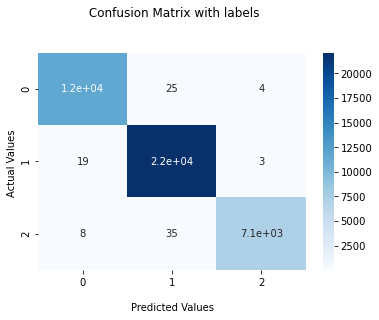

In [88]:

import seaborn as sns

ax = sns.heatmap(confusion, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

In [ ]:
import seaborn as sns
sns.heatmap(confusion, annot=True)